# Probelm Statments

- Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

- Data Description:
- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
sns.set_theme(style= "darkgrid")

# Import data set

In [2]:
df = pd.read_csv("crime_data.csv", index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


# # EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

# Describing the data

In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [8]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


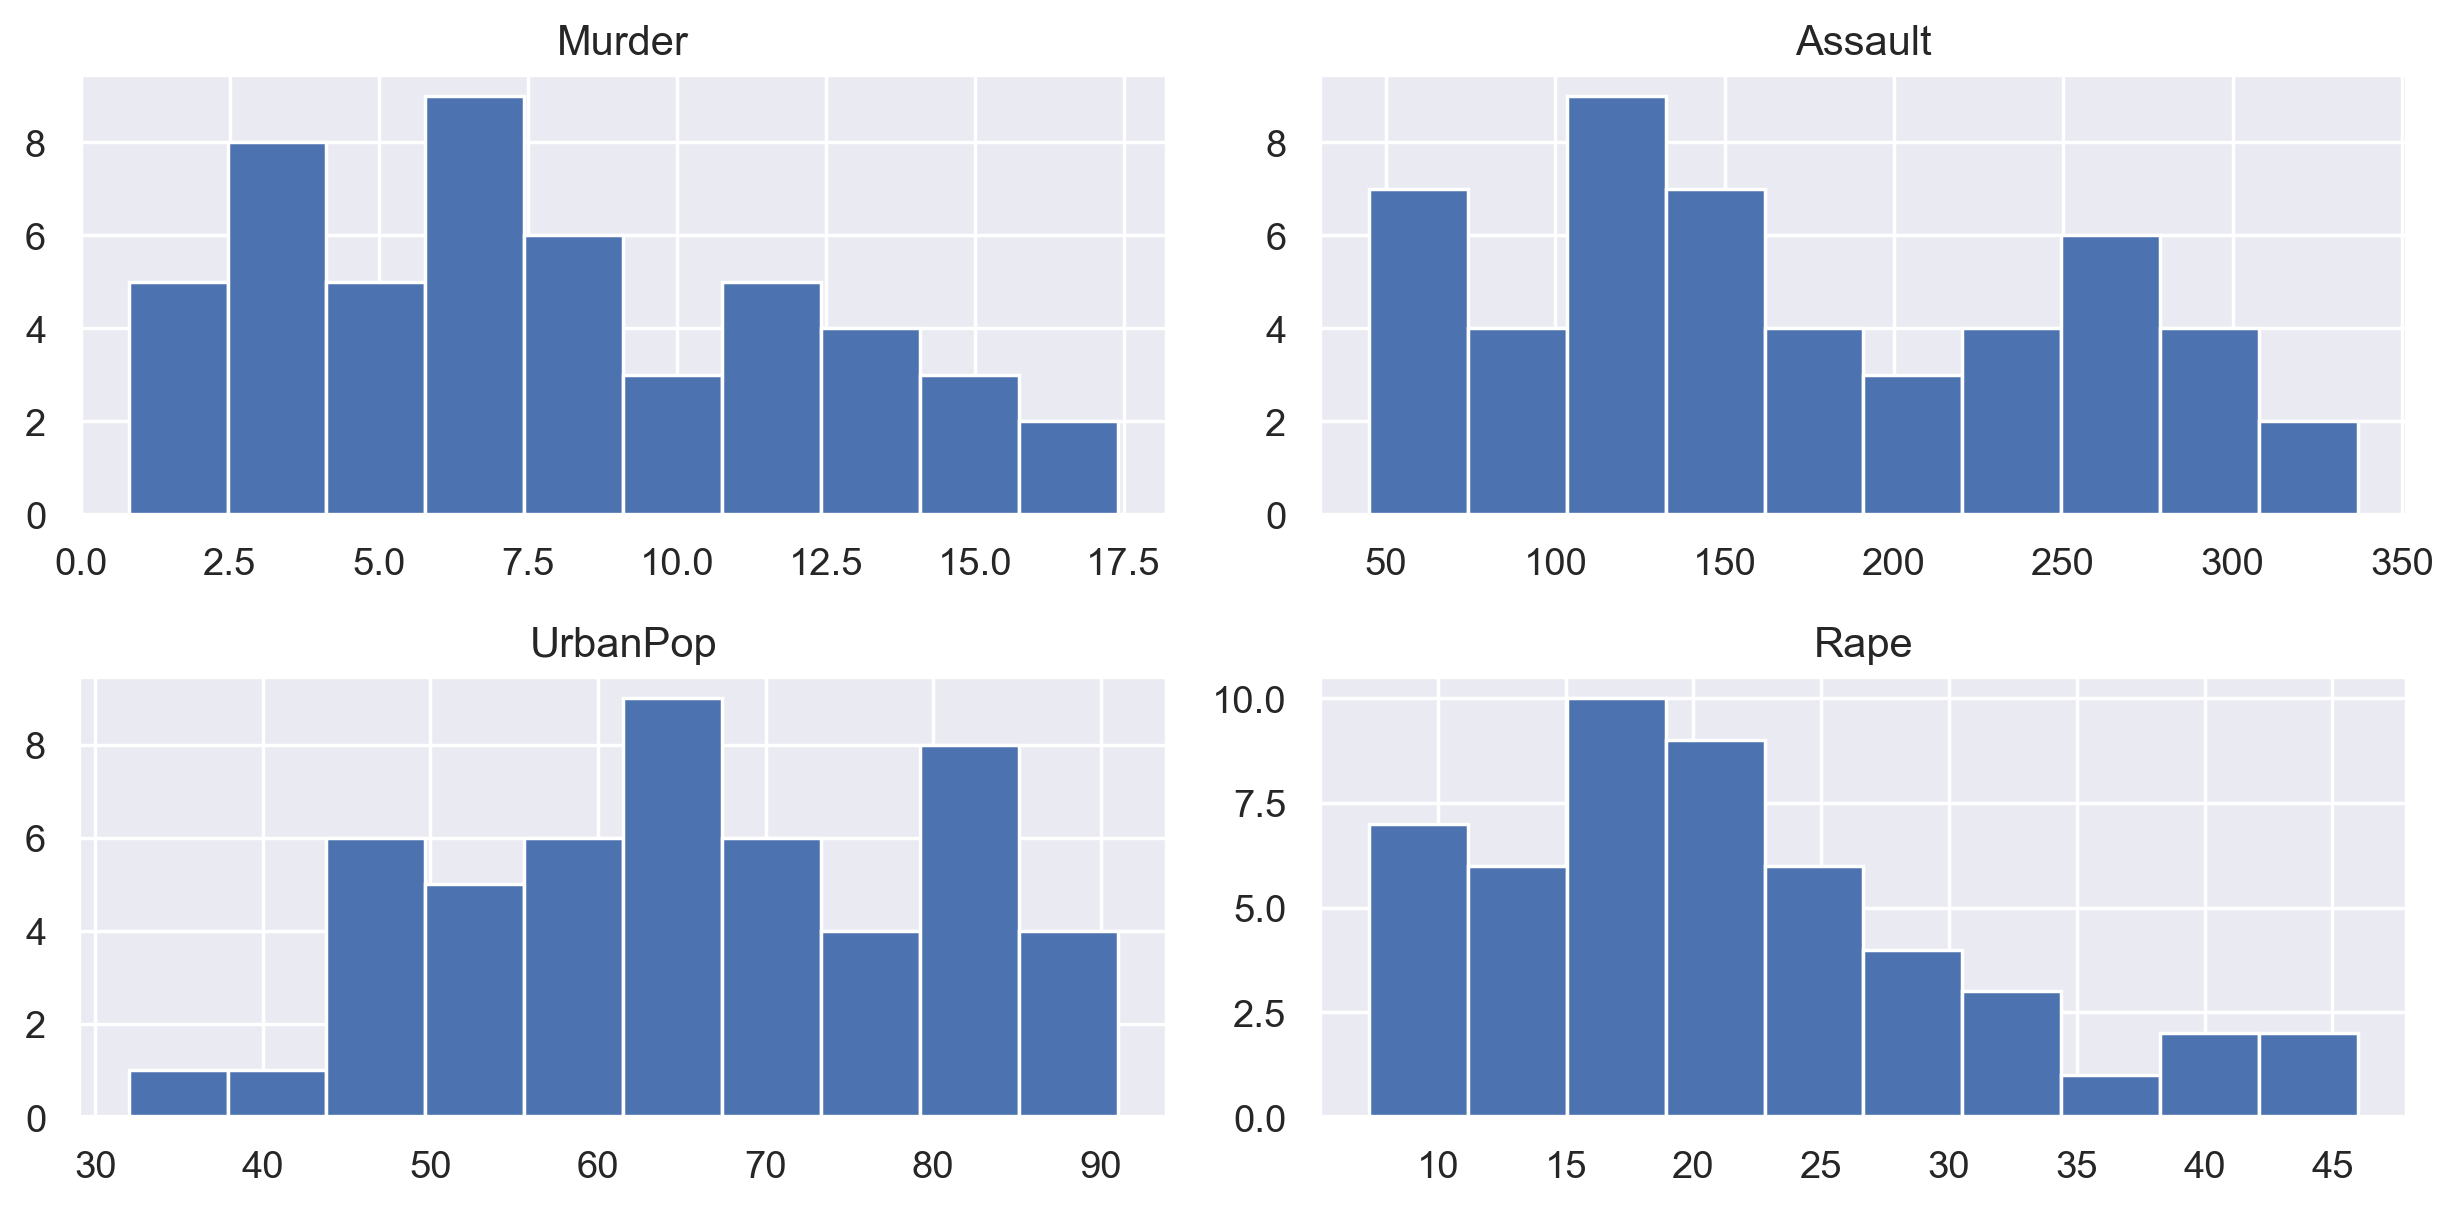

In [9]:
df.hist()
plt.tight_layout()

<Axes: >

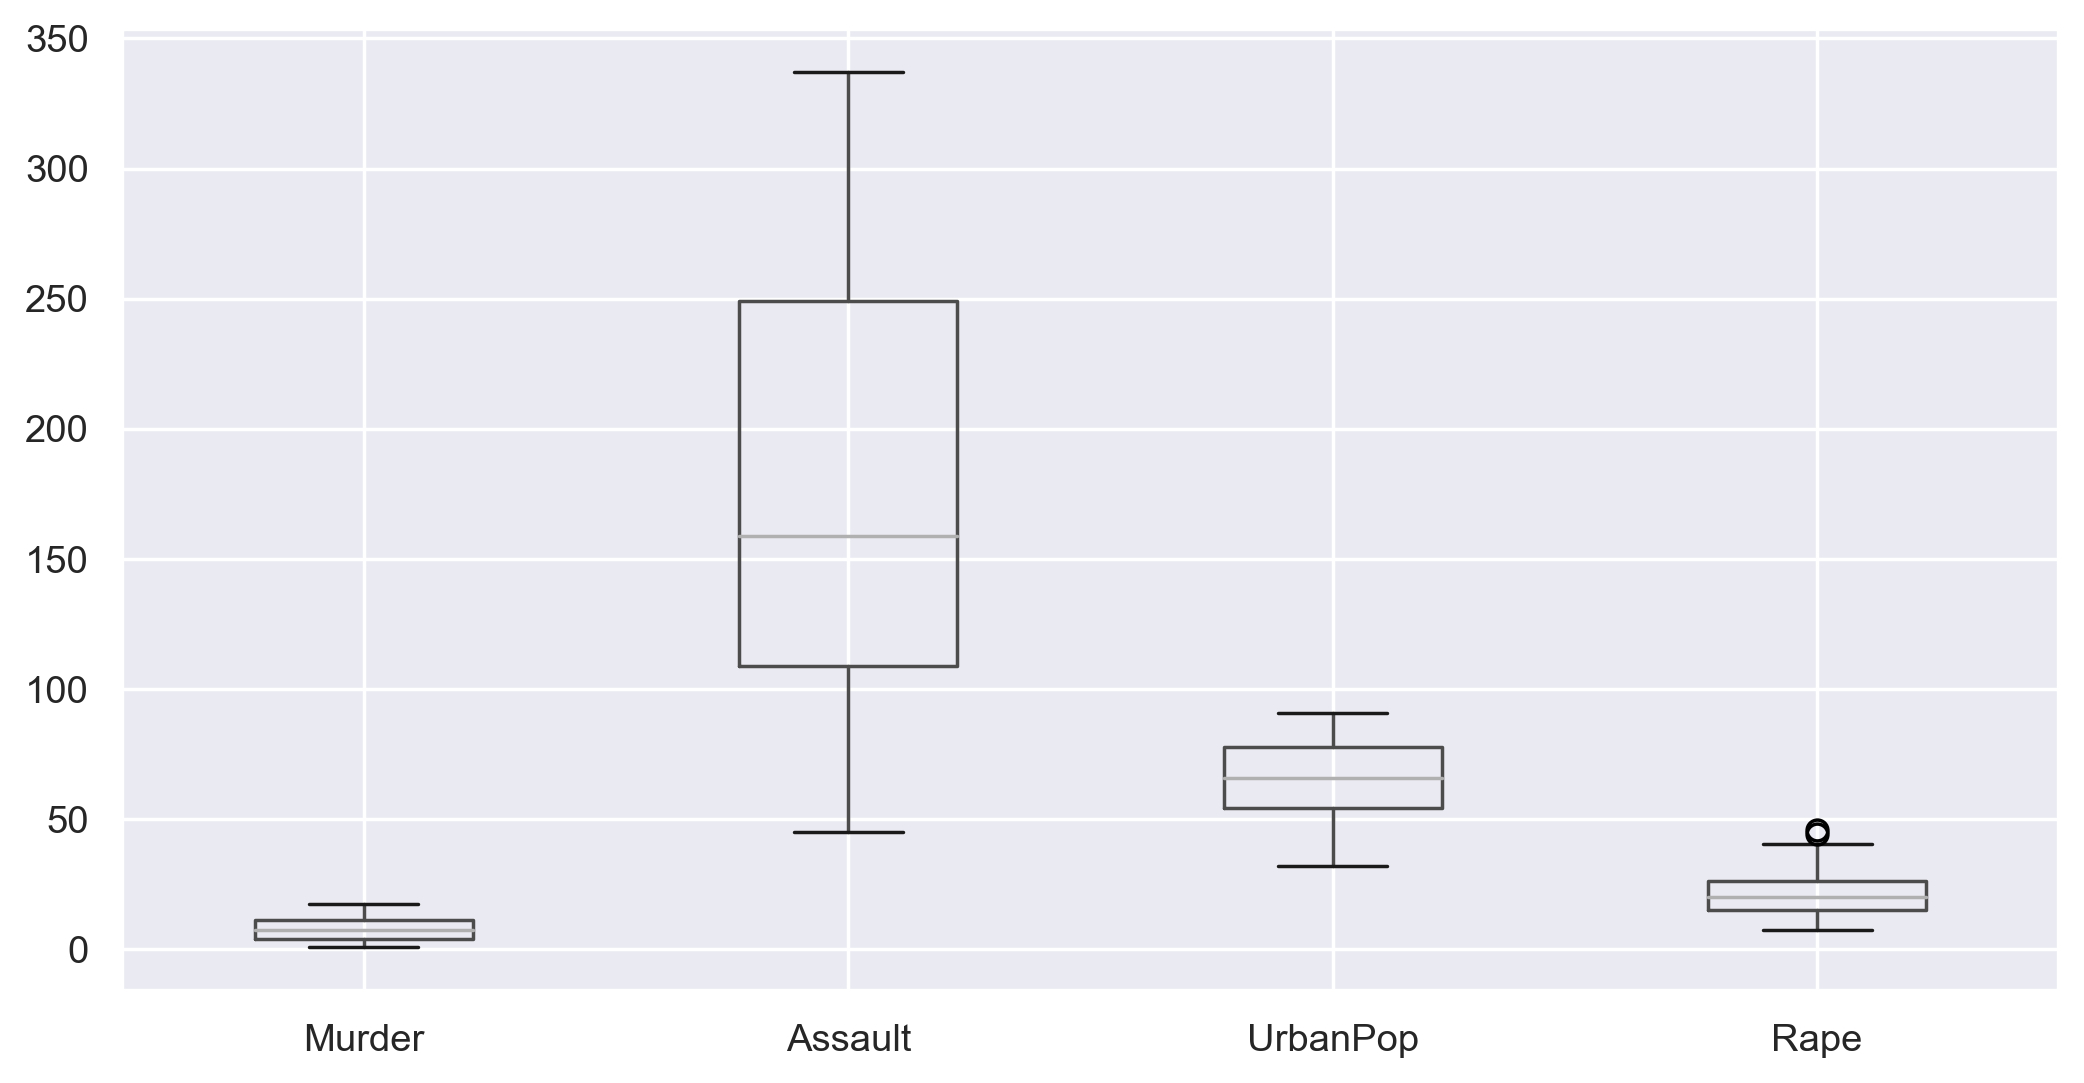

In [10]:
df.boxplot()

# While looking at the above box plot the rape columns only have outlier. Hence, before creating the model we should handle the outilers.

# Outlier detection function

In [11]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+1.5*iqr
    lower = q1-1.5*iqr
    
    return lower,upper

In [12]:
outlier_detection(df, "Rape")

(-1.5750000000000028, 42.825)

In [13]:
df.loc[df["Rape"]>42.825]

,Murder,Assault,UrbanPop,Rape
Alaska,10.0,263,48,44.5
Nevada,12.2,252,81,46.0


# Capping Outliers

Text(0.5, 1.0, 'Before the replacing the outiler with upper extreme values')

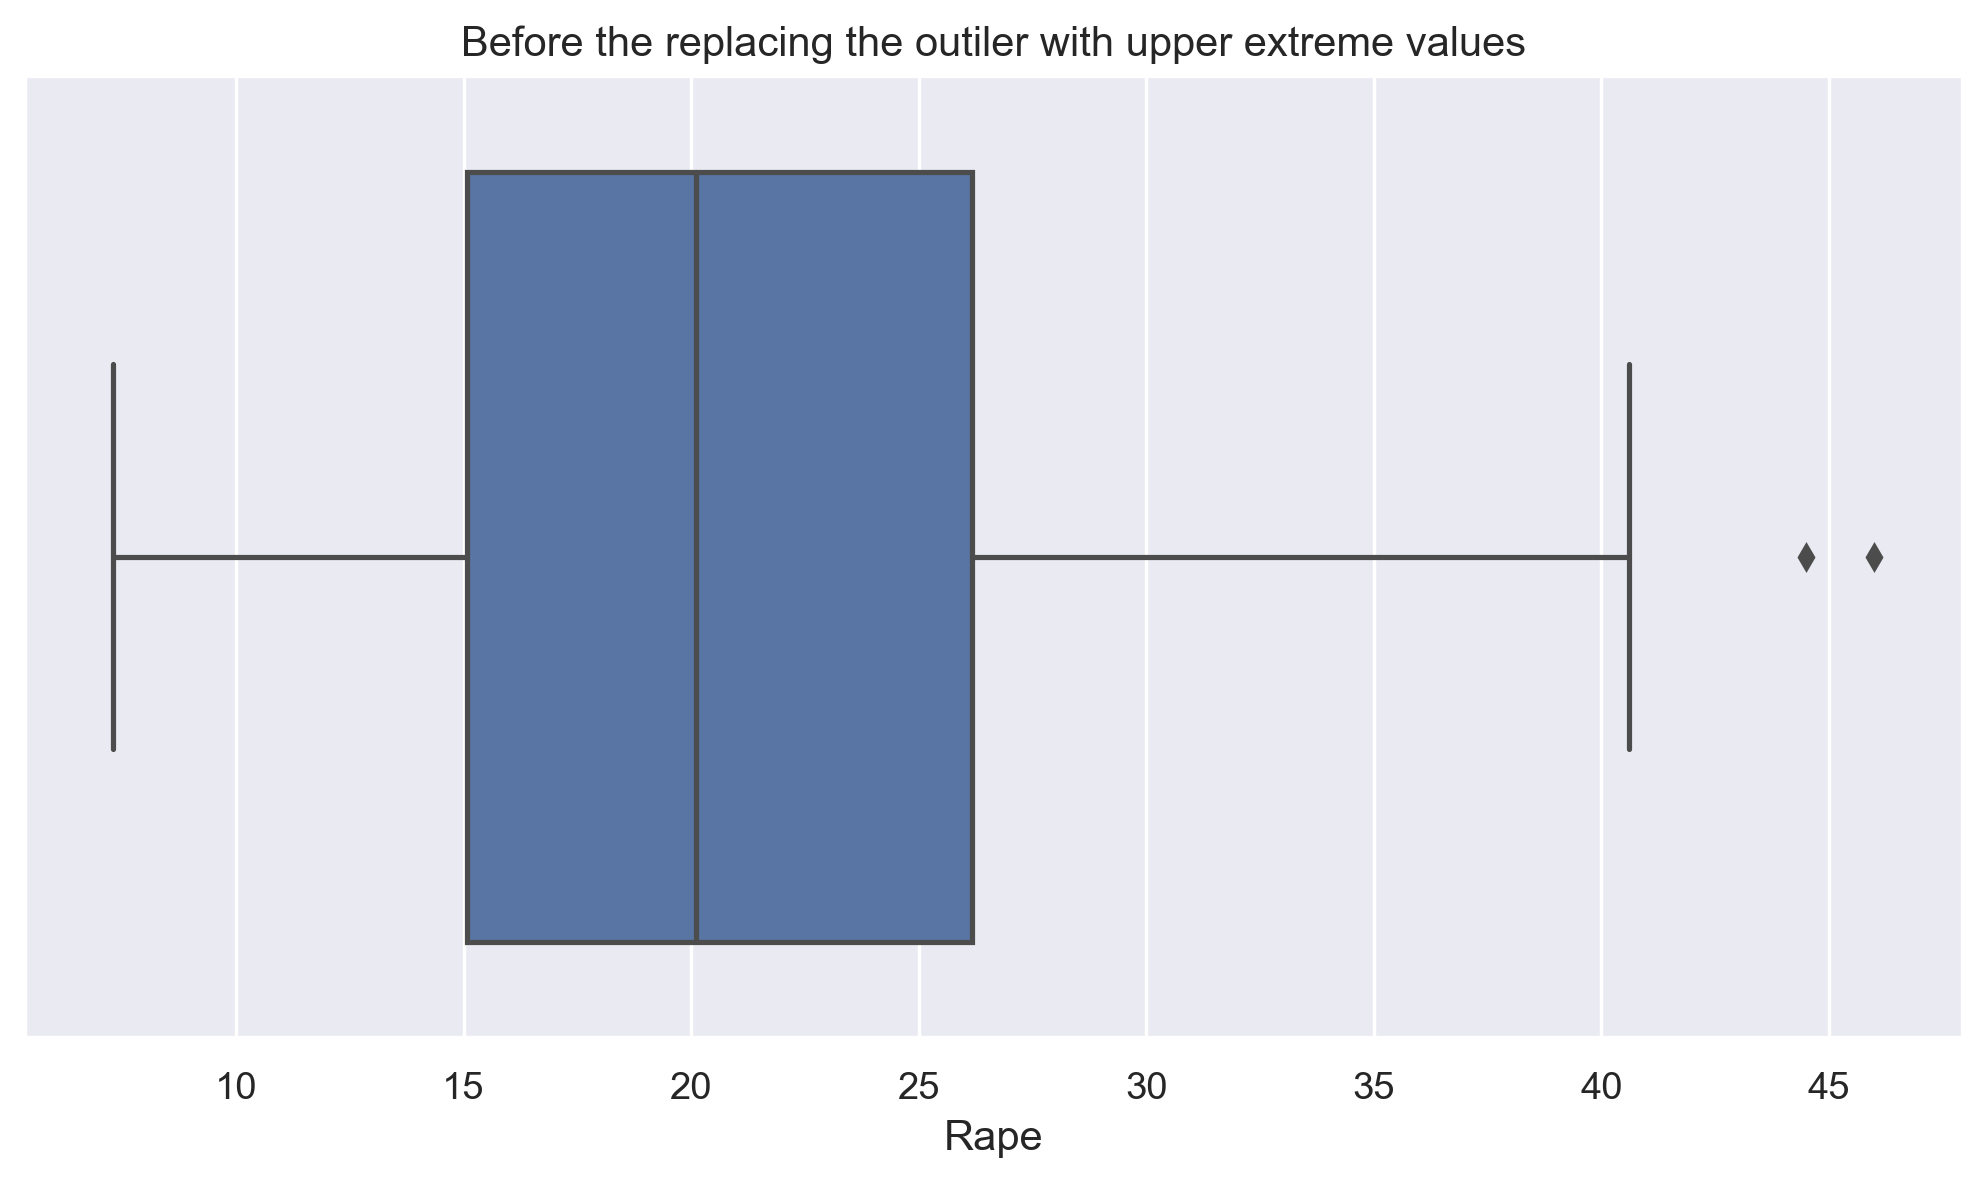

In [14]:
sns.boxplot(x= df["Rape"])
plt.xlabel("Rape")
plt.title("Before the replacing the outiler with upper extreme values")

In [18]:
df.loc[df["Rape"]>42.825, "Rape"] = 42.825

Text(0.5, 1.0, 'After the replacing the outiler with upper extreme values')

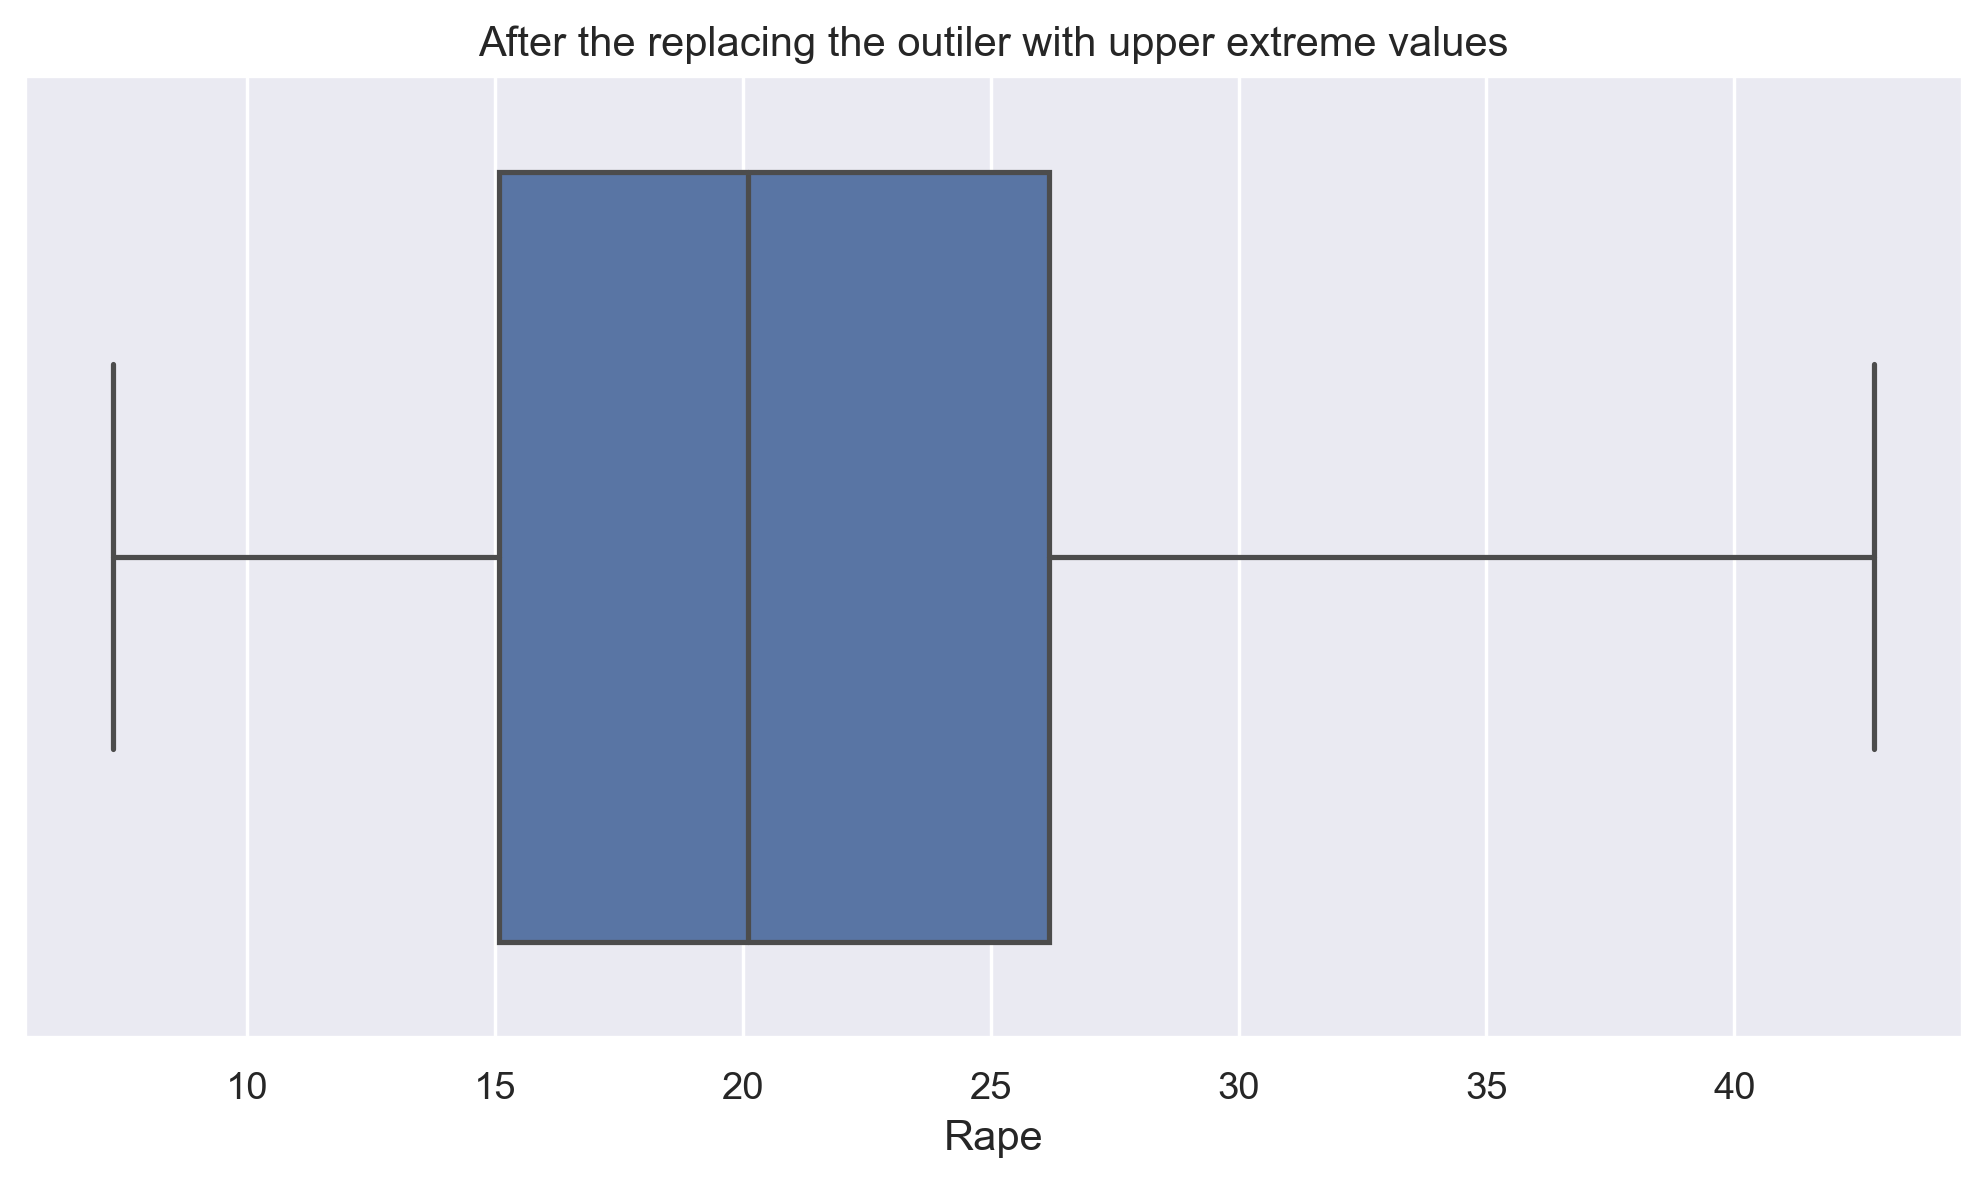

In [19]:
sns.boxplot(x= df["Rape"])
plt.xlabel("Rape")
plt.title("After the replacing the outiler with upper extreme values")

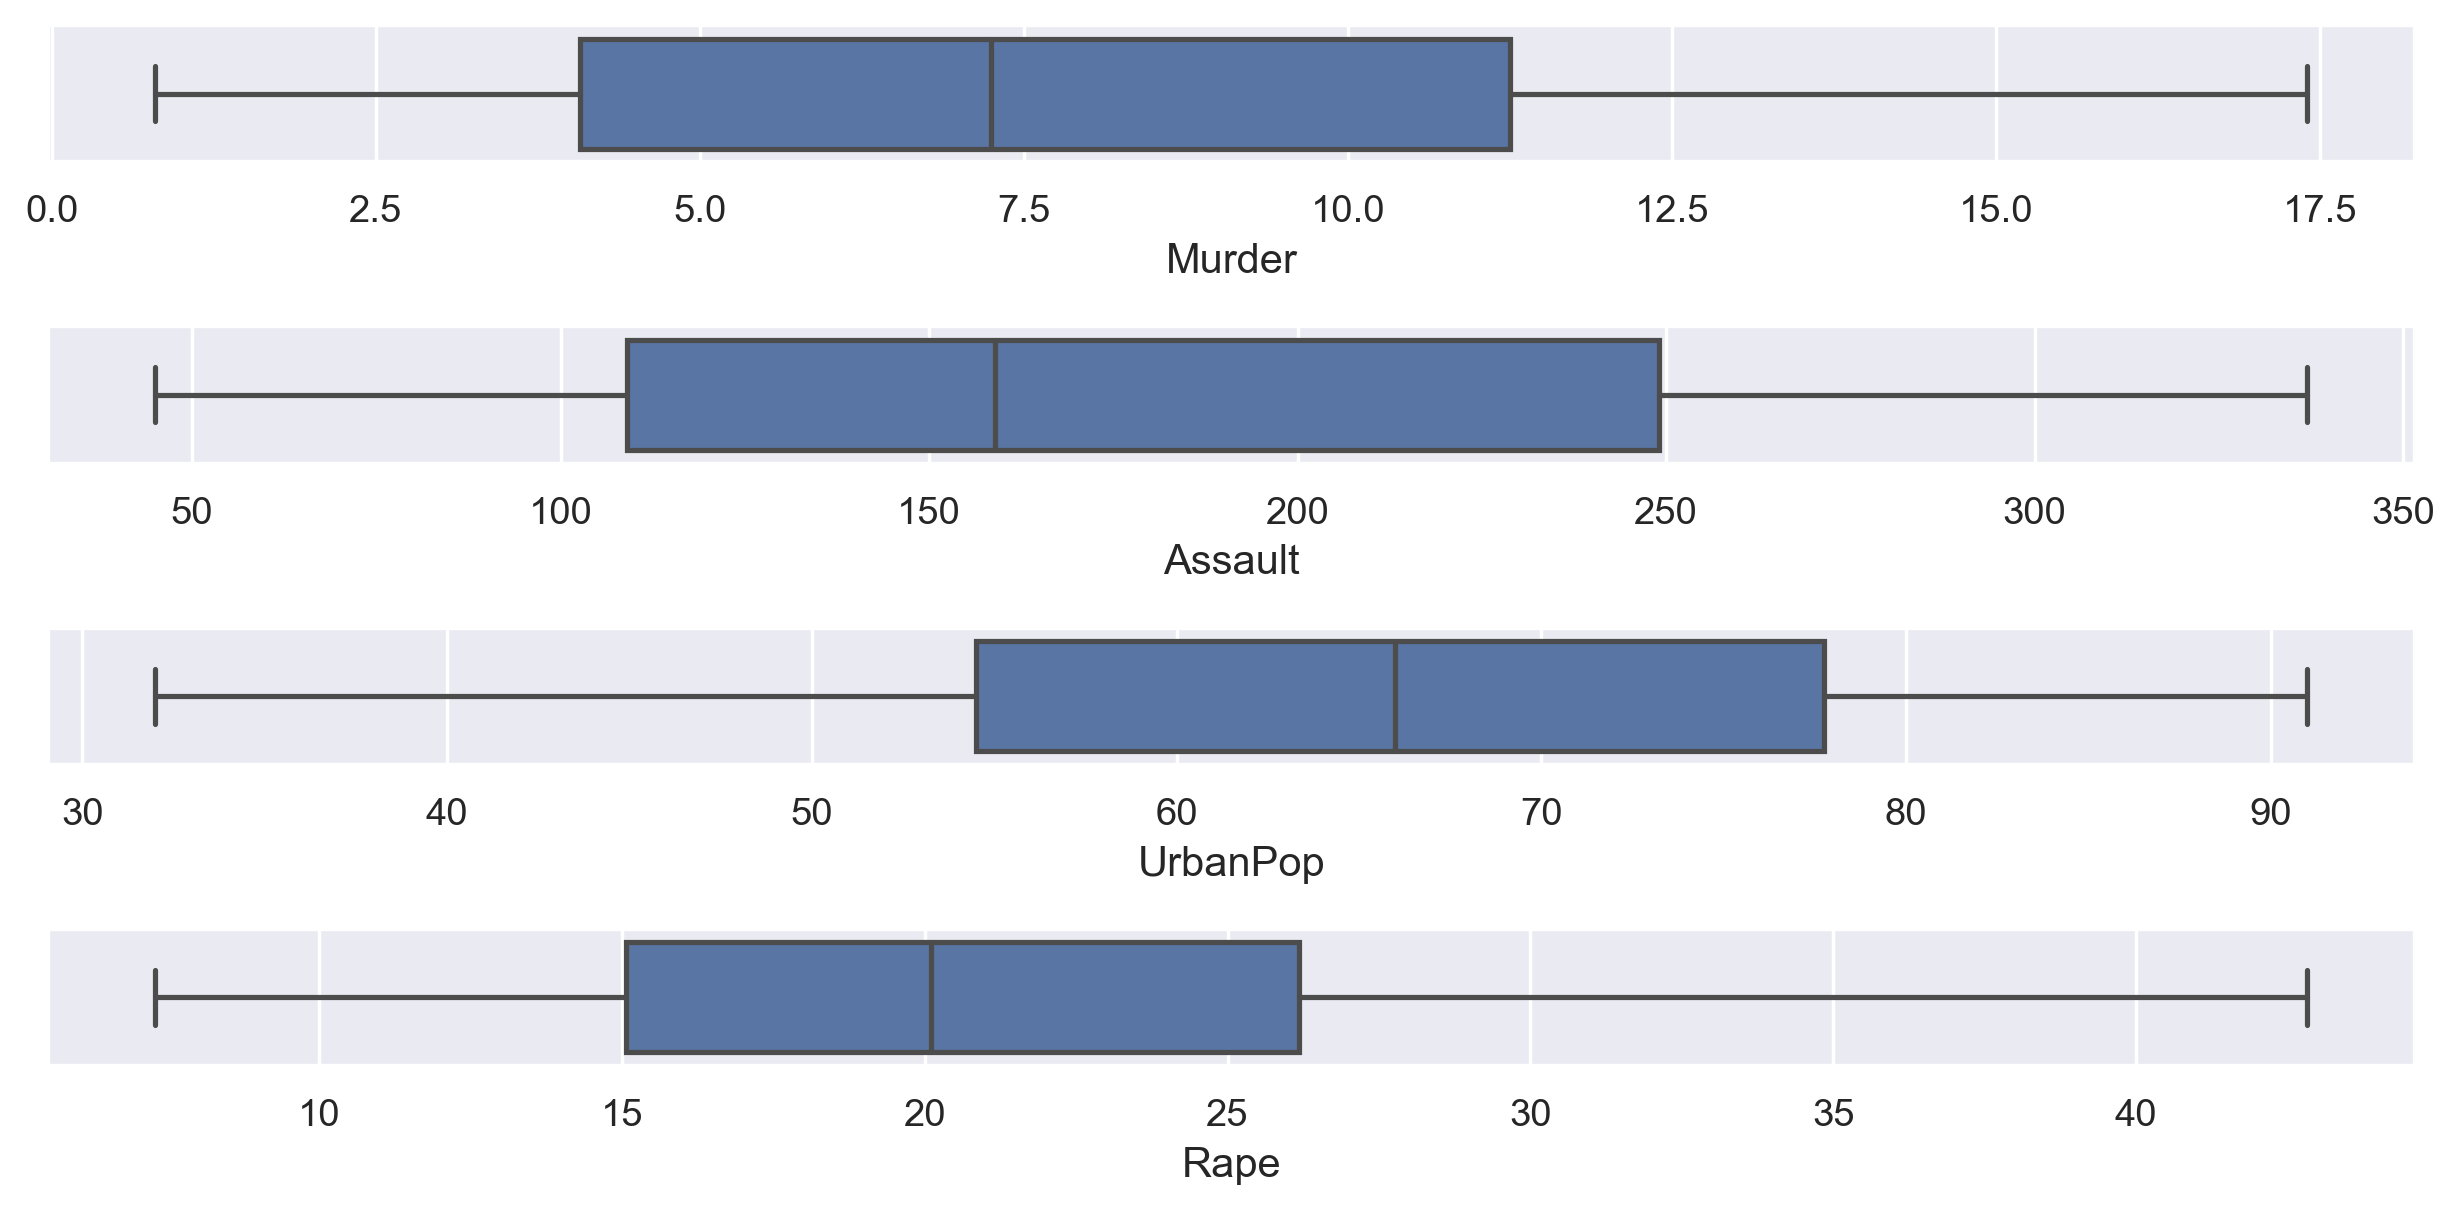

In [20]:
plt.subplot(4, 1, 1)
sns.boxplot(x=df["Murder"])
plt.tight_layout()

plt.subplot(4,1,2)
sns.boxplot(x=df["Assault"])
plt.tight_layout()

plt.subplot(4,1,3)
sns.boxplot(x=df["UrbanPop"])
plt.tight_layout()

plt.subplot(4,1,4)
sns.boxplot(x=df["Rape"])
plt.tight_layout()

# While looking at the above all the box plot they have no outliers. Hence, now the data set is ready to create the model

# Scatter Plot and Correlation

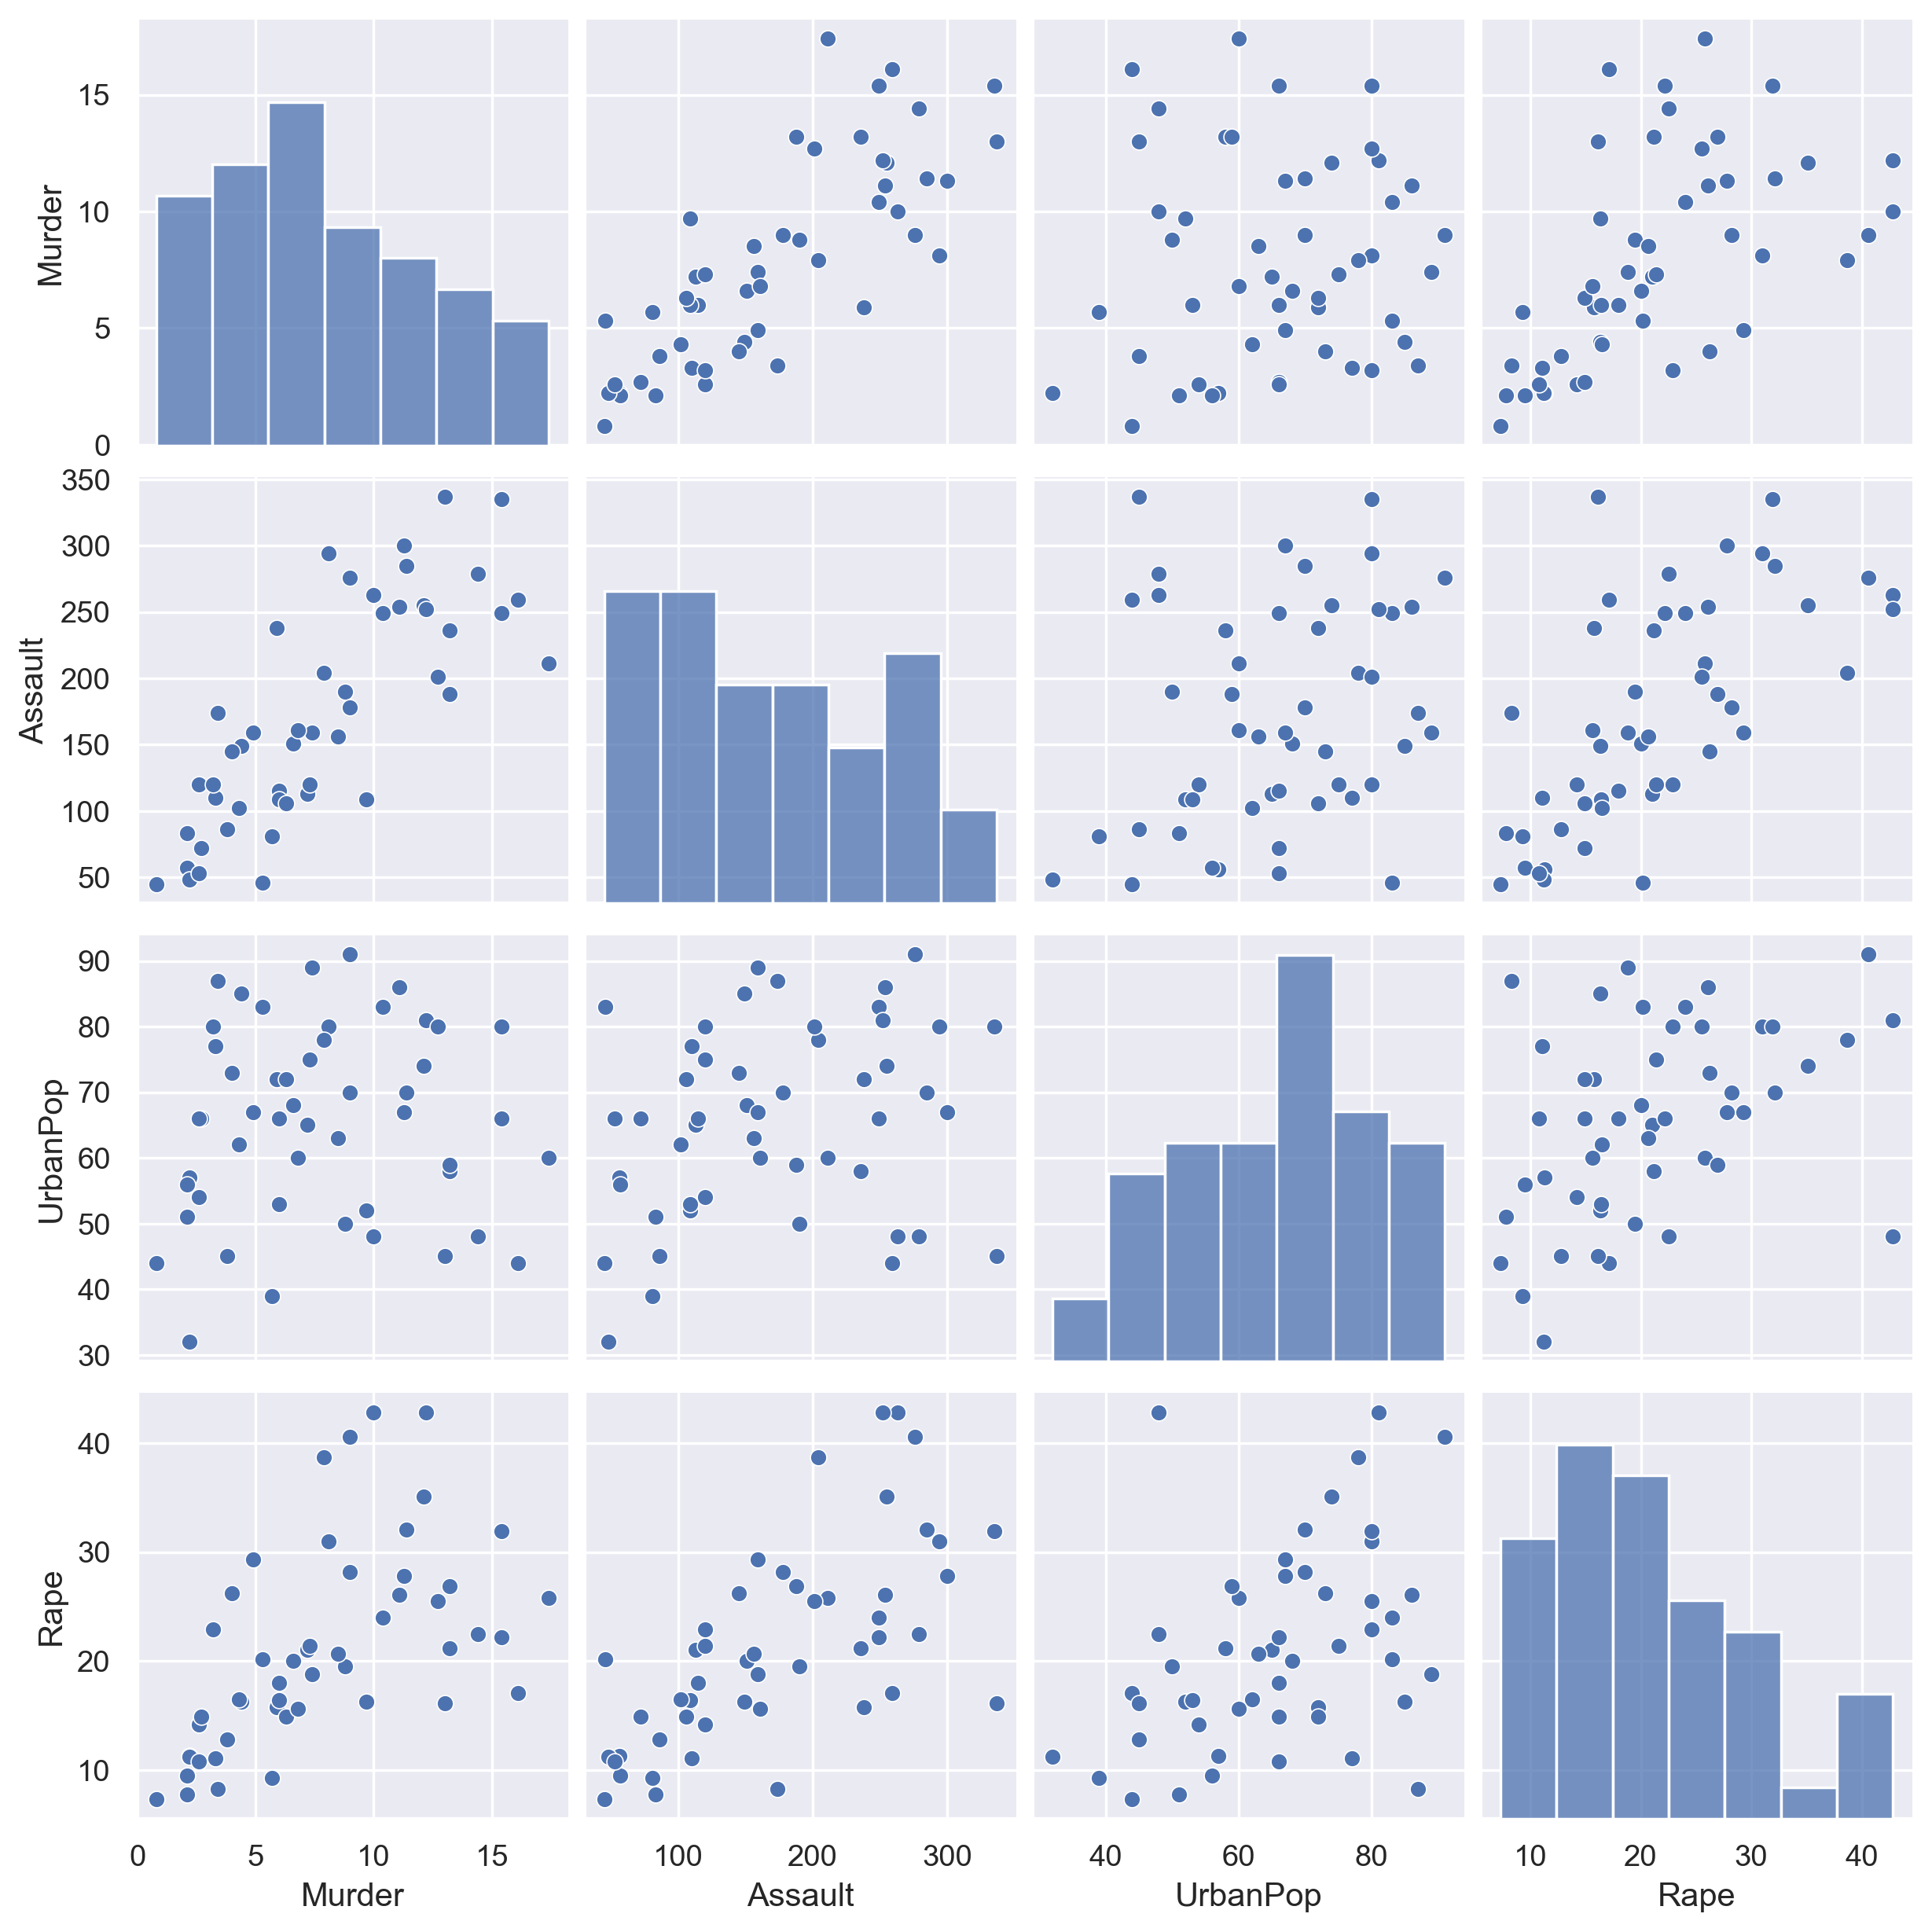

In [21]:
sns.pairplot(df)

# **Scaling the data**

- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [22]:
from sklearn.preprocessing import StandardScaler

# standardscaler

In [23]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.00719922],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.07236067,  1.49381682,  1.00912225,  1.0926203 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18108811],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.15588993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.94545115],
       [-1.04088037, -0.73648418,  0.79976079, -1.11144904],
       [-0.43787481,  0.81502956,  0.45082502, -0.59088995],
       [ 1.76541475,  1.99078607,  1.00912225,  1.19230183],
       [ 2.22926518,  0.48775713, -0.38662083,  0.51668259],
       [-0.57702994, -1.51224105,  1.21848371, -0.10355803],
       [-1.20322802, -0.61527217, -0.80534376, -0.76810155],
       [ 0.60578867,  0.94836277,  1.21848371,  0.31731953],
       [-0.13637203, -0.70012057, -0.03768506, -0.01495223],
       [-1.29599811, -1.39102904, -0.5959823 , -1.08929758],
       [-0.41468229, -0.67587817,  0.03210209, -0.34722399],
       [ 0.44344101, -0.

In [24]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [25]:
pd.DataFrame(x, columns = df.columns)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,0.007199
1,0.513019,1.118060,-1.224067,2.402325
2,0.072361,1.493817,1.009122,1.092620
3,0.234708,0.233212,-1.084492,-0.181088
4,0.281093,1.275635,1.776781,2.155890
5,0.025976,0.402909,0.869548,1.945451
6,-1.040880,-0.736484,0.799761,-1.111449
7,-0.437875,0.815030,0.450825,-0.590890
8,1.765415,1.990786,1.009122,1.192302
9,2.229265,0.487757,-0.386621,0.516683


# Hierarchical Clustering

# Dendrogram with single and complete linkage

In [26]:
from scipy.cluster import hierarchy

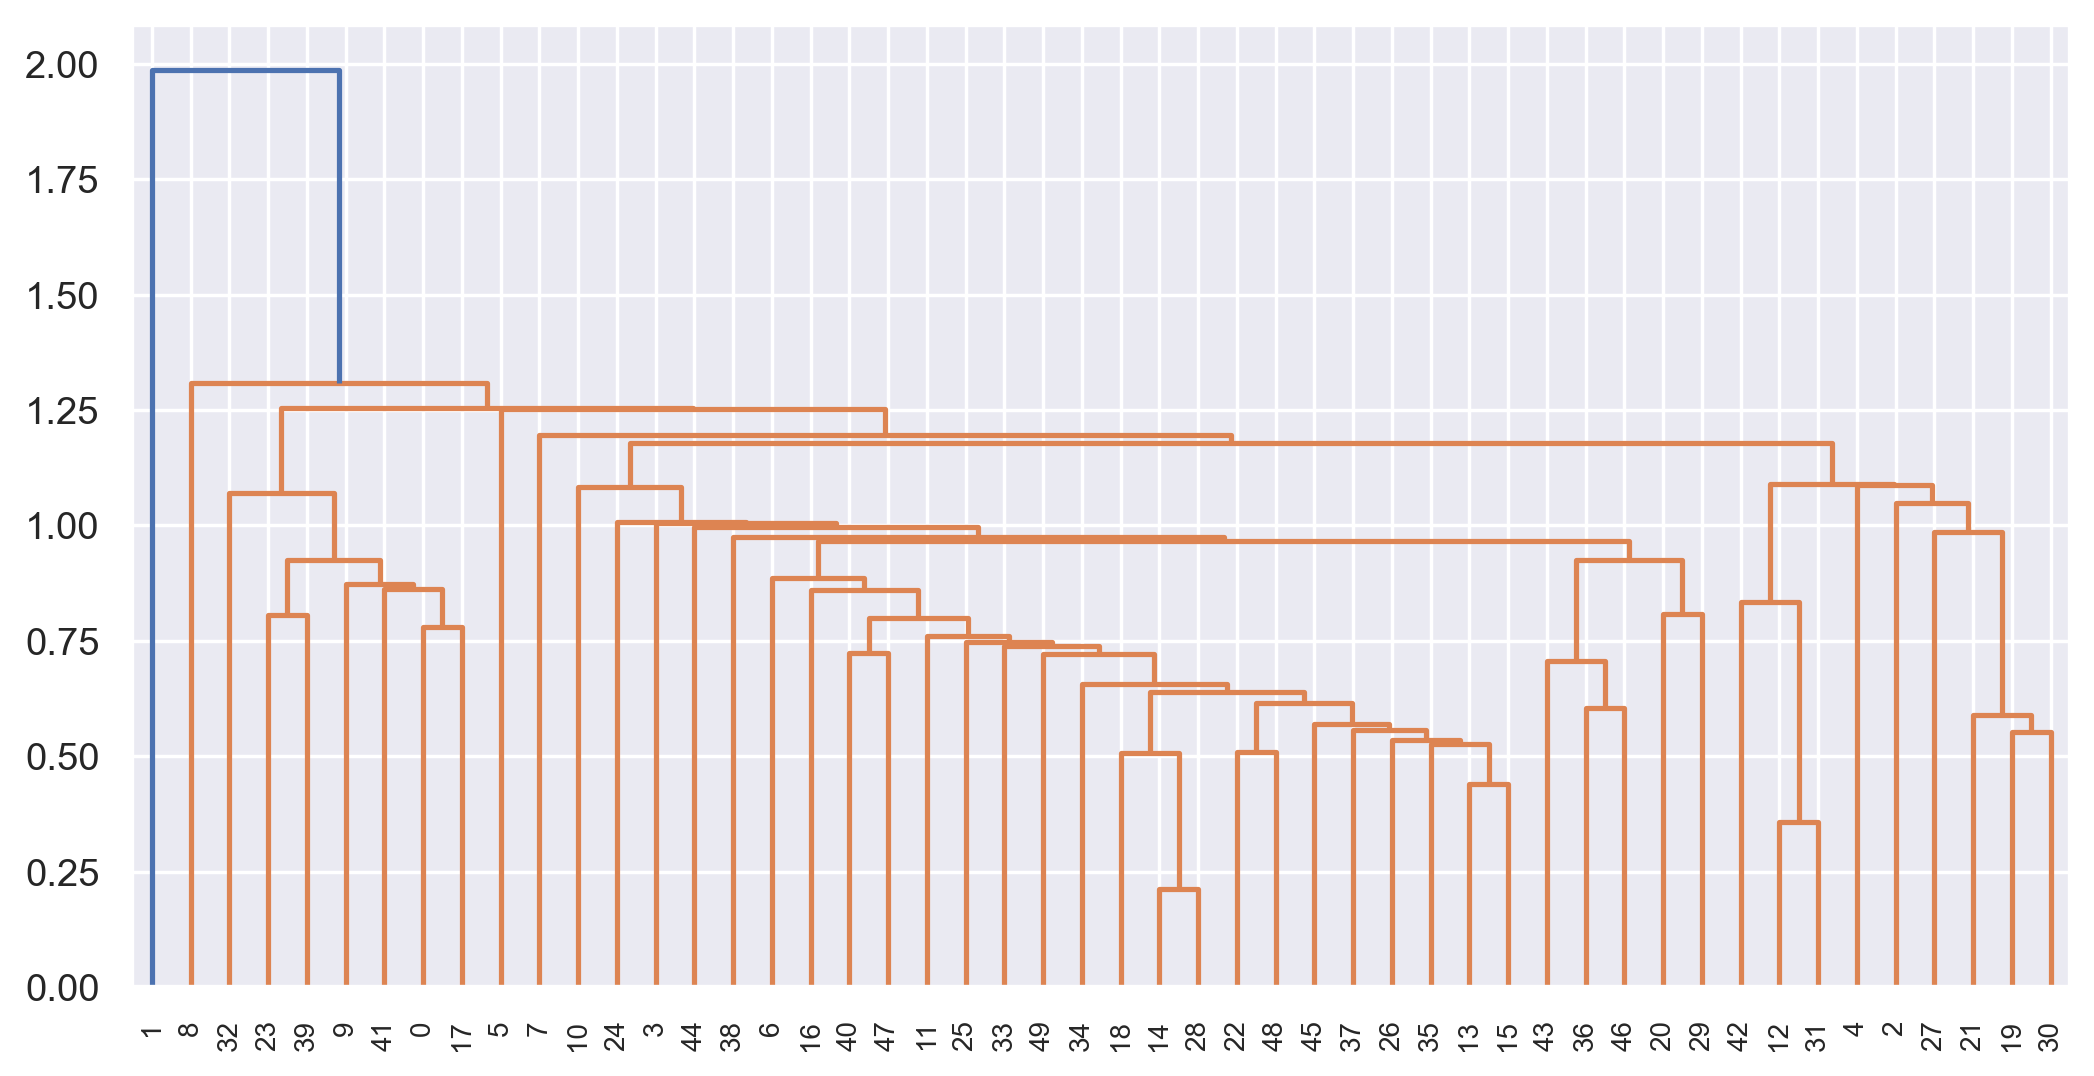

In [29]:
lk = hierarchy.linkage(x, method="single")
dendrogram = hierarchy.dendrogram(lk)

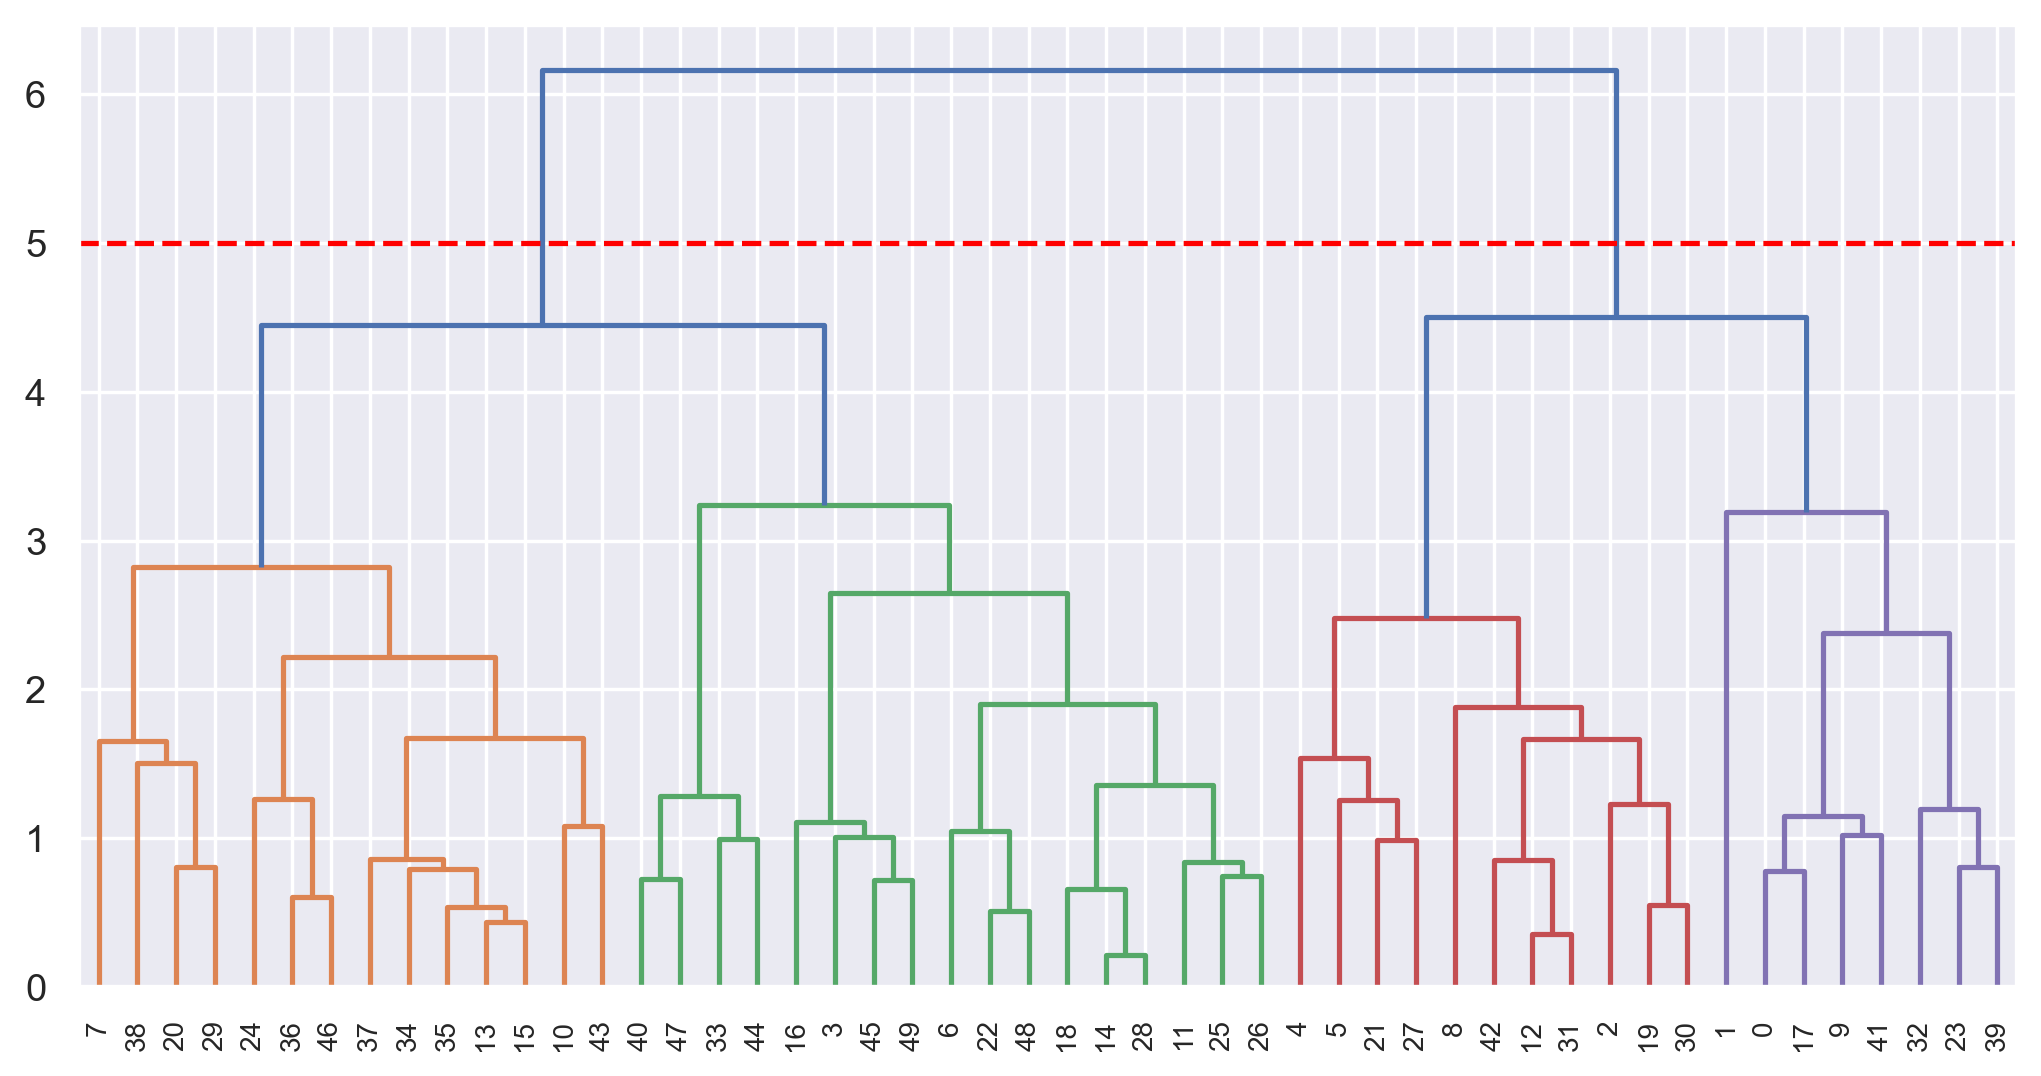

In [30]:
lk = hierarchy.linkage(x, method="complete")
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y =5, linestyle = "--", color ="red")

# Model Building

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
hc = AgglomerativeClustering(n_clusters=2)

ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
len(ypred)

50

In [34]:
df["Hierarchical Clustering"] = ypred
df

,Murder,Assault,UrbanPop,Rape,Hierarchical Clustering
Alabama,13.2,236,58,21.200,1
Alaska,10.0,263,48,42.825,1
Arizona,8.1,294,80,31.000,1
Arkansas,8.8,190,50,19.500,0
California,9.0,276,91,40.600,1
Colorado,7.9,204,78,38.700,1
Connecticut,3.3,110,77,11.100,0
Delaware,5.9,238,72,15.800,0
Florida,15.4,335,80,31.900,1
Georgia,17.4,211,60,25.800,1


# Analyzing the clusters

In [40]:
df.groupby("Hierarchical Clustering").agg("mean")

,Murder,Assault,UrbanPop,Rape
Hierarchical Clustering,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,28.960526


<Axes: xlabel='Murder', ylabel='UrbanPop'>

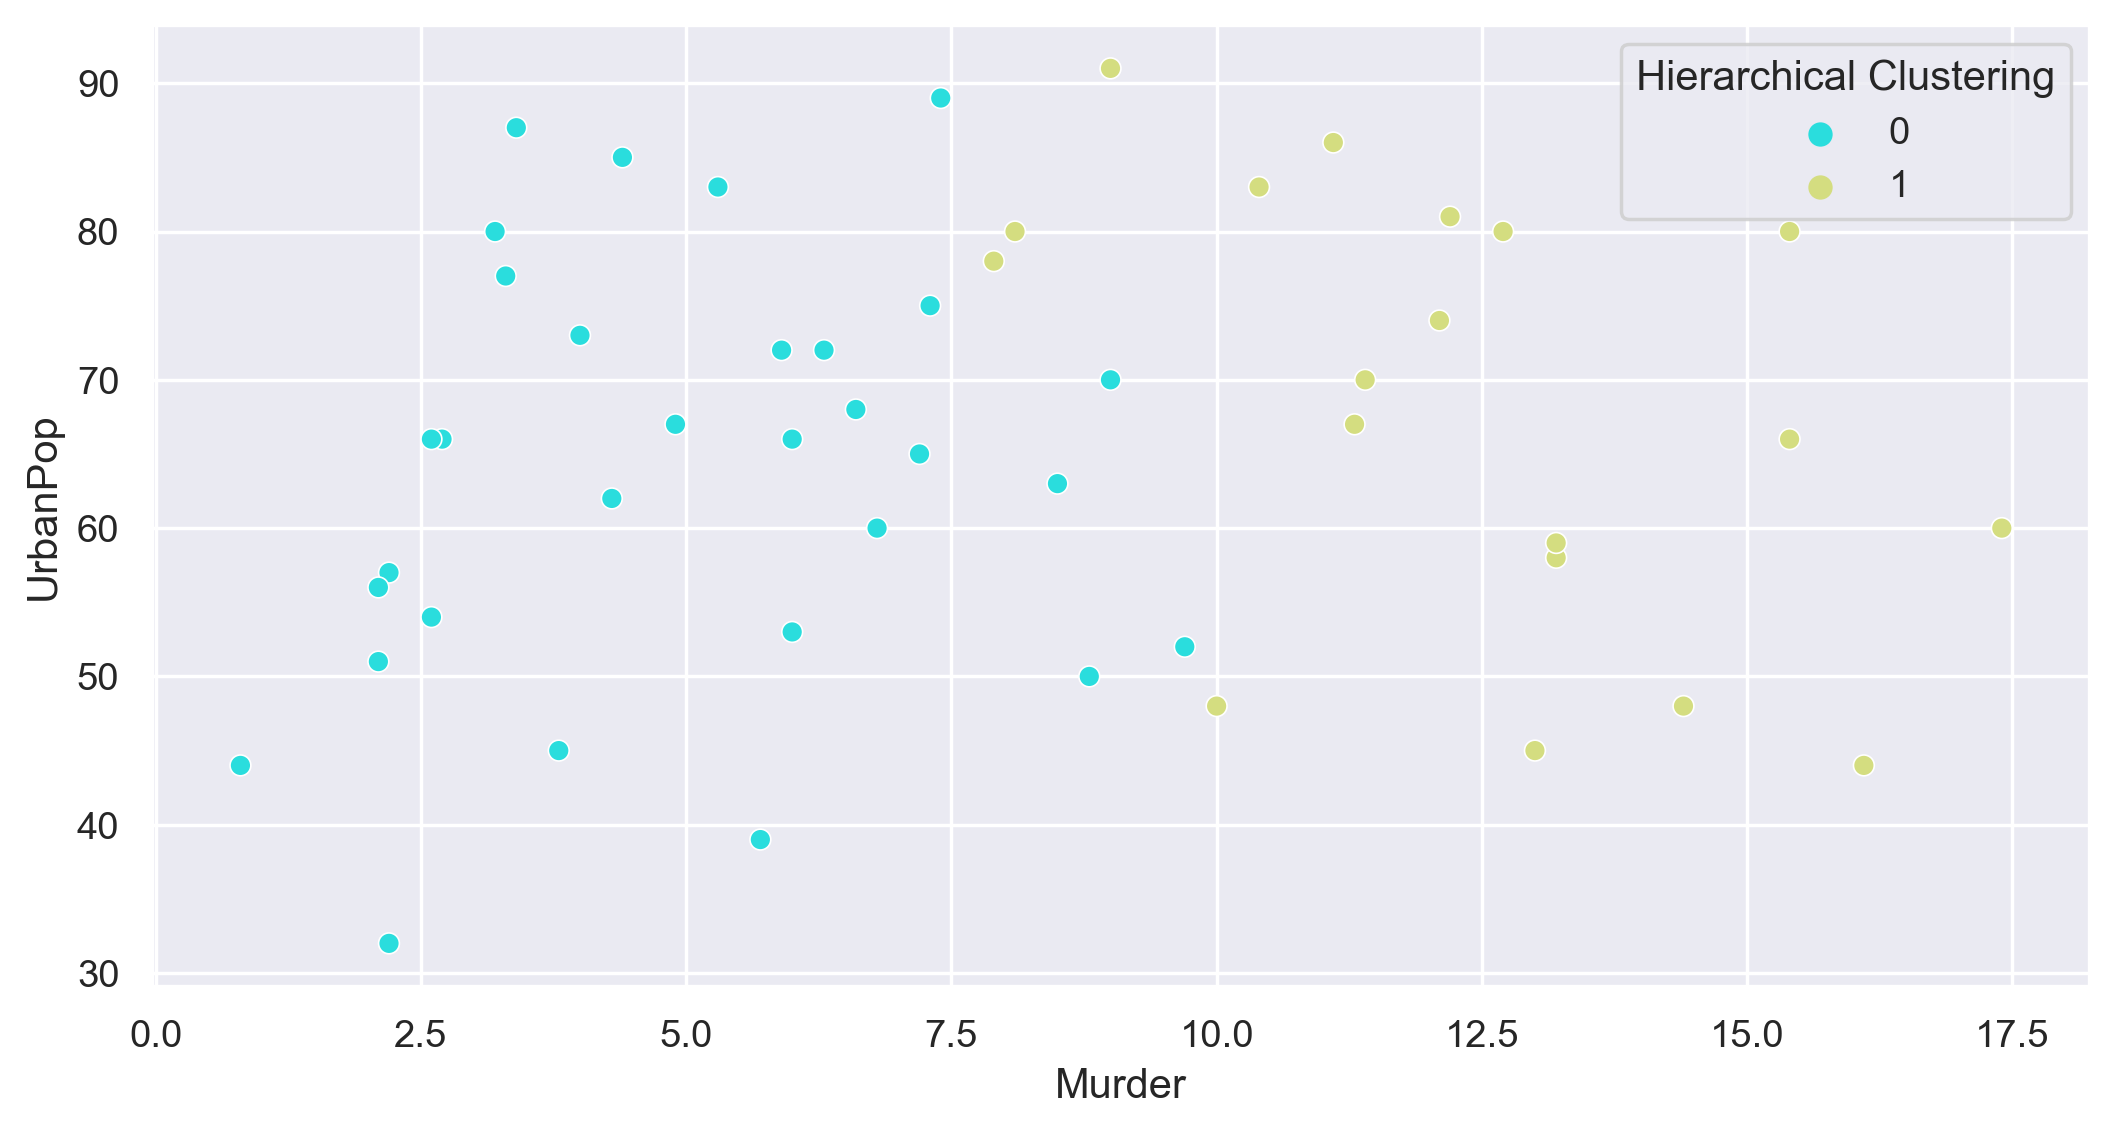

In [41]:
sns.scatterplot(x = df["Murder"], y= df["UrbanPop"], hue=df["Hierarchical Clustering"], palette = "rainbow")

<Axes: xlabel='Rape', ylabel='UrbanPop'>

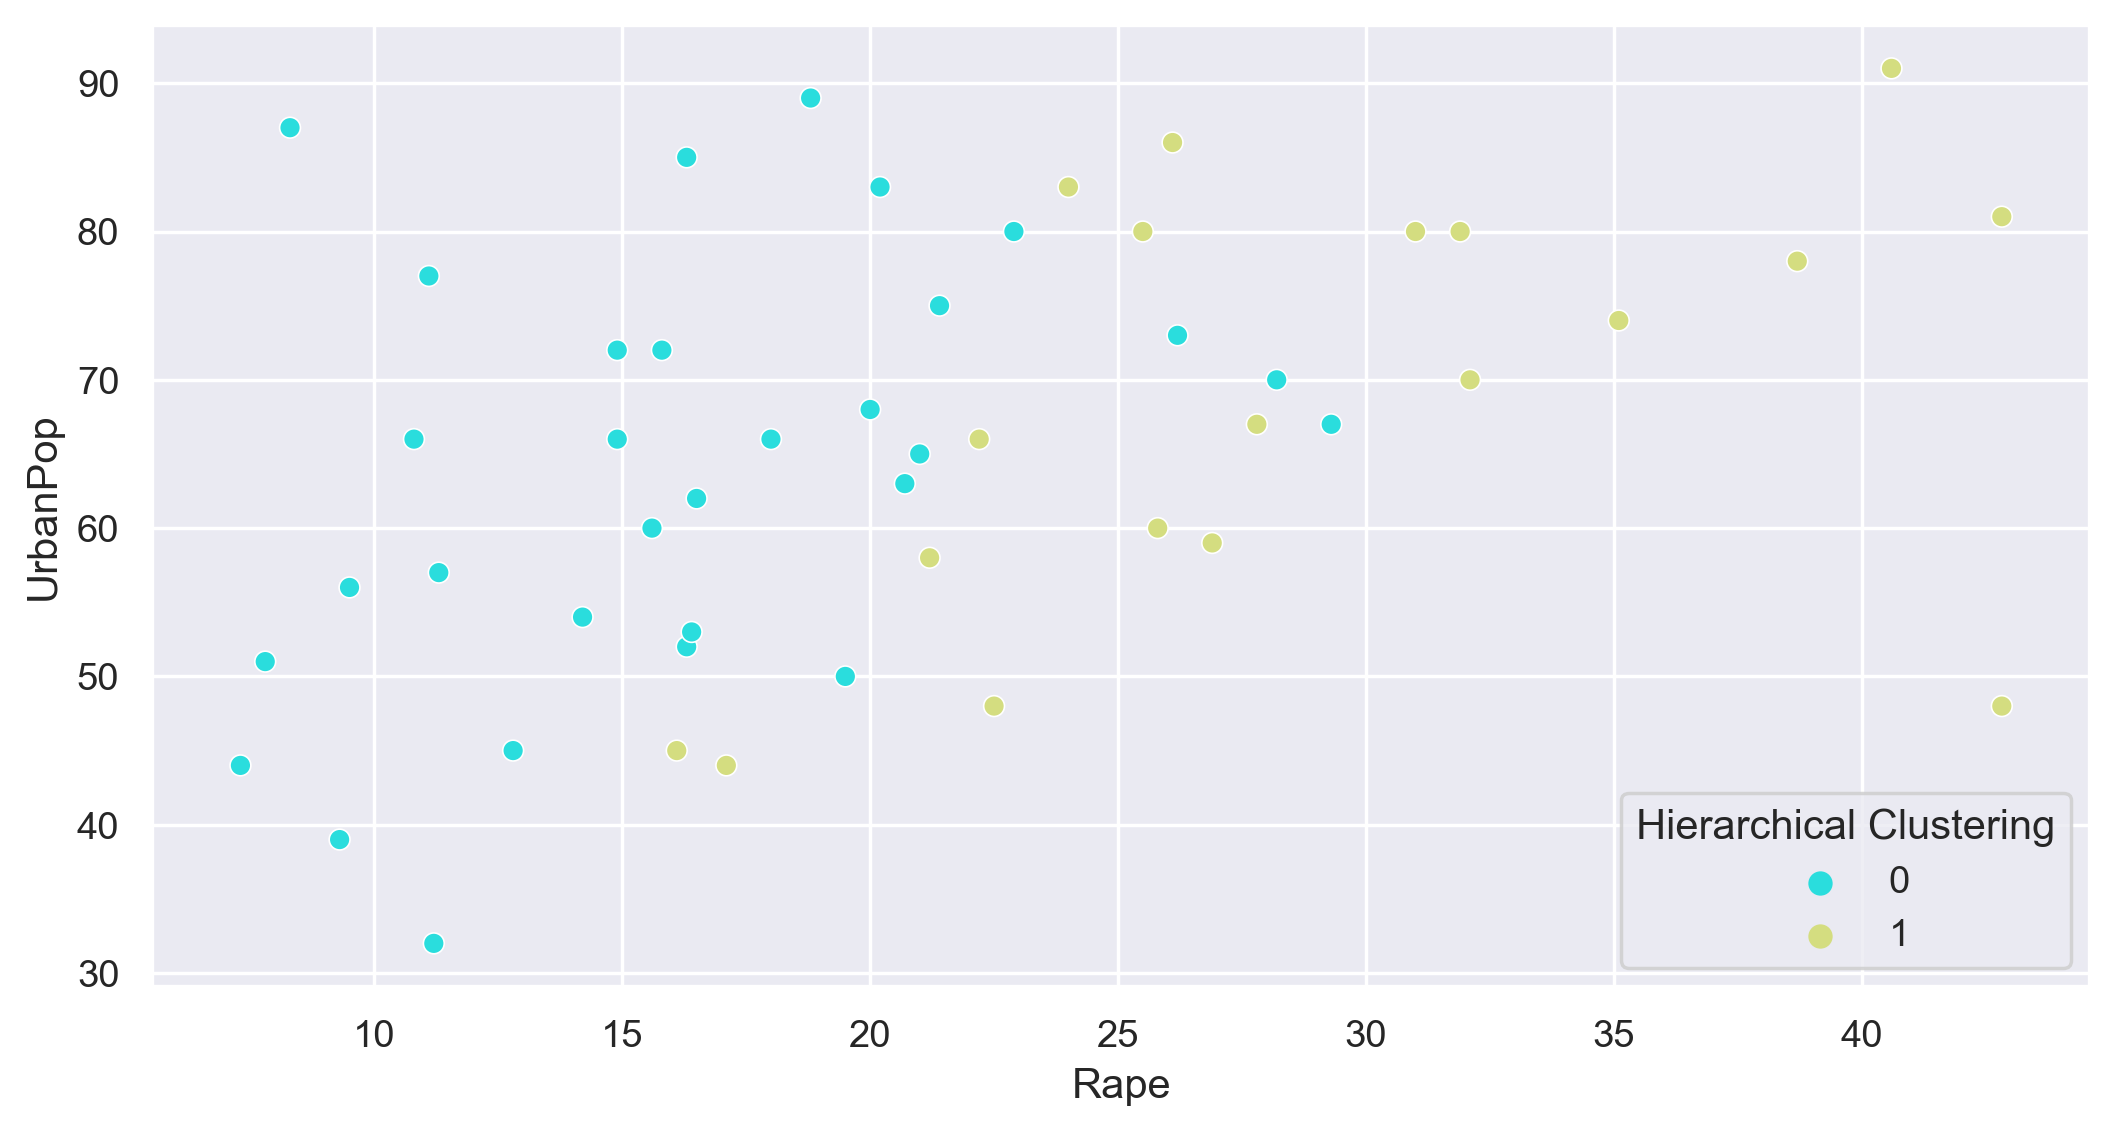

In [42]:
sns.scatterplot(x = df["Rape"], y= df["UrbanPop"], hue=df["Hierarchical Clustering"], palette = "rainbow")

<Axes: xlabel='Assault', ylabel='UrbanPop'>

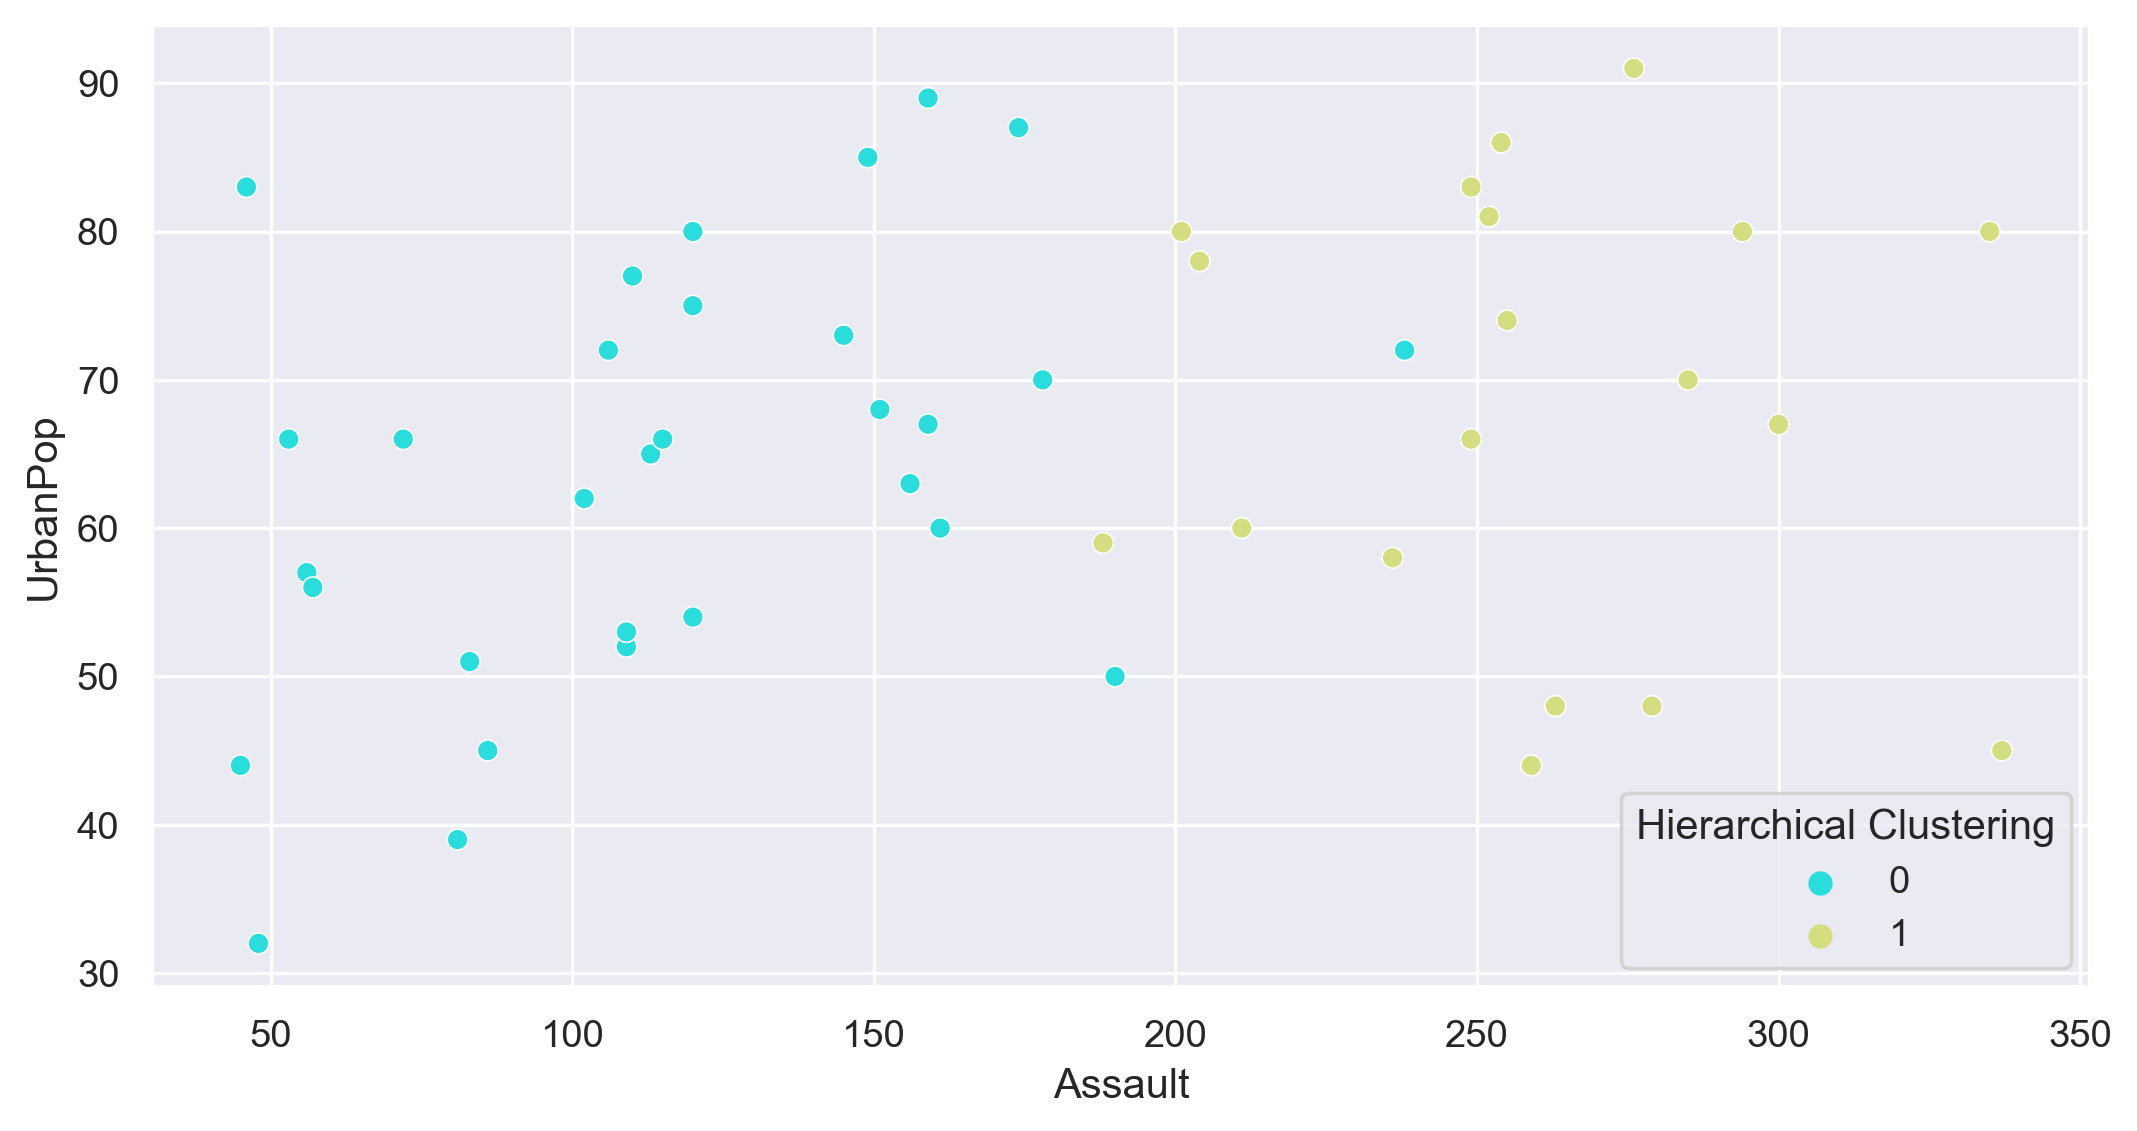

In [43]:
sns.scatterplot(x = df["Assault"], y= df["UrbanPop"], hue=df["Hierarchical Clustering"], palette = "rainbow")

# K-Means Clustering

In [44]:
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.00719922],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.07236067,  1.49381682,  1.00912225,  1.0926203 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18108811],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.15588993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.94545115],
       [-1.04088037, -0.73648418,  0.79976079, -1.11144904],
       [-0.43787481,  0.81502956,  0.45082502, -0.59088995],
       [ 1.76541475,  1.99078607,  1.00912225,  1.19230183],
       [ 2.22926518,  0.48775713, -0.38662083,  0.51668259],
       [-0.57702994, -1.51224105,  1.21848371, -0.10355803],
       [-1.20322802, -0.61527217, -0.80534376, -0.76810155],
       [ 0.60578867,  0.94836277,  1.21848371,  0.31731953],
       [-0.13637203, -0.70012057, -0.03768506, -0.01495223],
       [-1.29599811, -1.39102904, -0.5959823 , -1.08929758],
       [-0.41468229, -0.67587817,  0.03210209, -0.34722399],
       [ 0.44344101, -0.

In [45]:
x[:,0].mean()

-7.105427357601002e-17

In [46]:
x[:,1].mean()

1.3877787807814457e-16

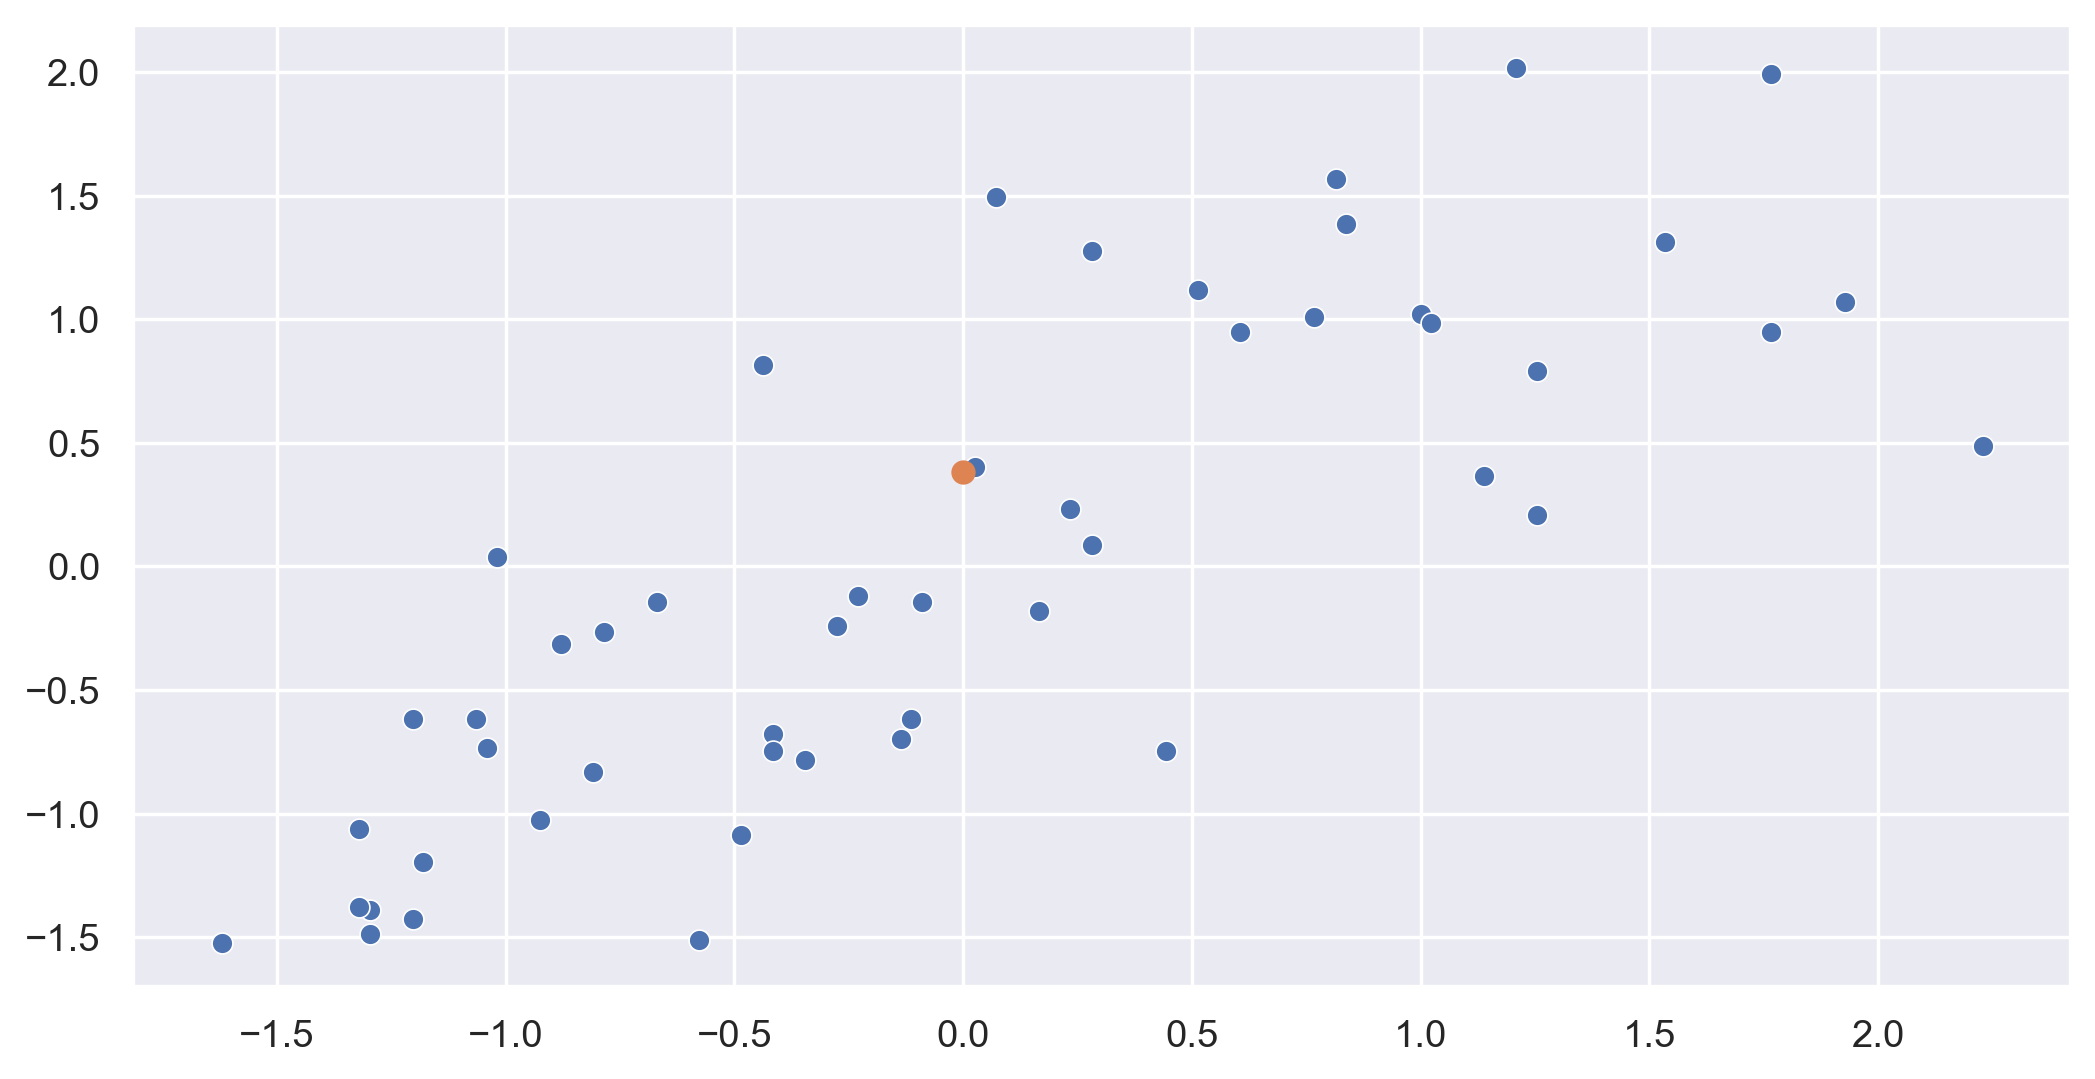

In [47]:
sns.scatterplot(x = x[:,0], y = x[:,1])
plt.scatter(x[:,0].mean(),x[0:1].mean())

# Model Building

In [48]:
from sklearn.cluster import KMeans

In [49]:
km = KMeans()
yp = km.fit_predict(x)
km

KMeans()

In [50]:
yp

array([3, 6, 4, 2, 1, 1, 5, 2, 4, 3, 5, 7, 4, 2, 0, 7, 2, 3, 0, 4, 5, 1,
       7, 3, 2, 7, 7, 1, 0, 5, 4, 4, 3, 0, 5, 2, 2, 7, 5, 3, 0, 3, 4, 5,
       0, 2, 5, 0, 7, 2])

In [51]:
len(yp)

50

# cluster centre

In [52]:
km.cluster_centers_

array([[-1.1800355 , -1.28020663, -1.3437018 , -1.24593999],
       [ 0.58259614,  0.92109007,  1.0789094 ,  2.01259774],
       [-0.06937141, -0.11022212, -0.17725937, -0.04694877],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0609956 ],
       [ 0.85759319,  1.2513928 ,  0.86954794,  0.79832246],
       [-0.69589161, -0.51981771,  1.0876328 , -0.3306104 ],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [-0.79570229, -0.89752299, -0.19719856, -0.66842002]])

# Visualize the clusters

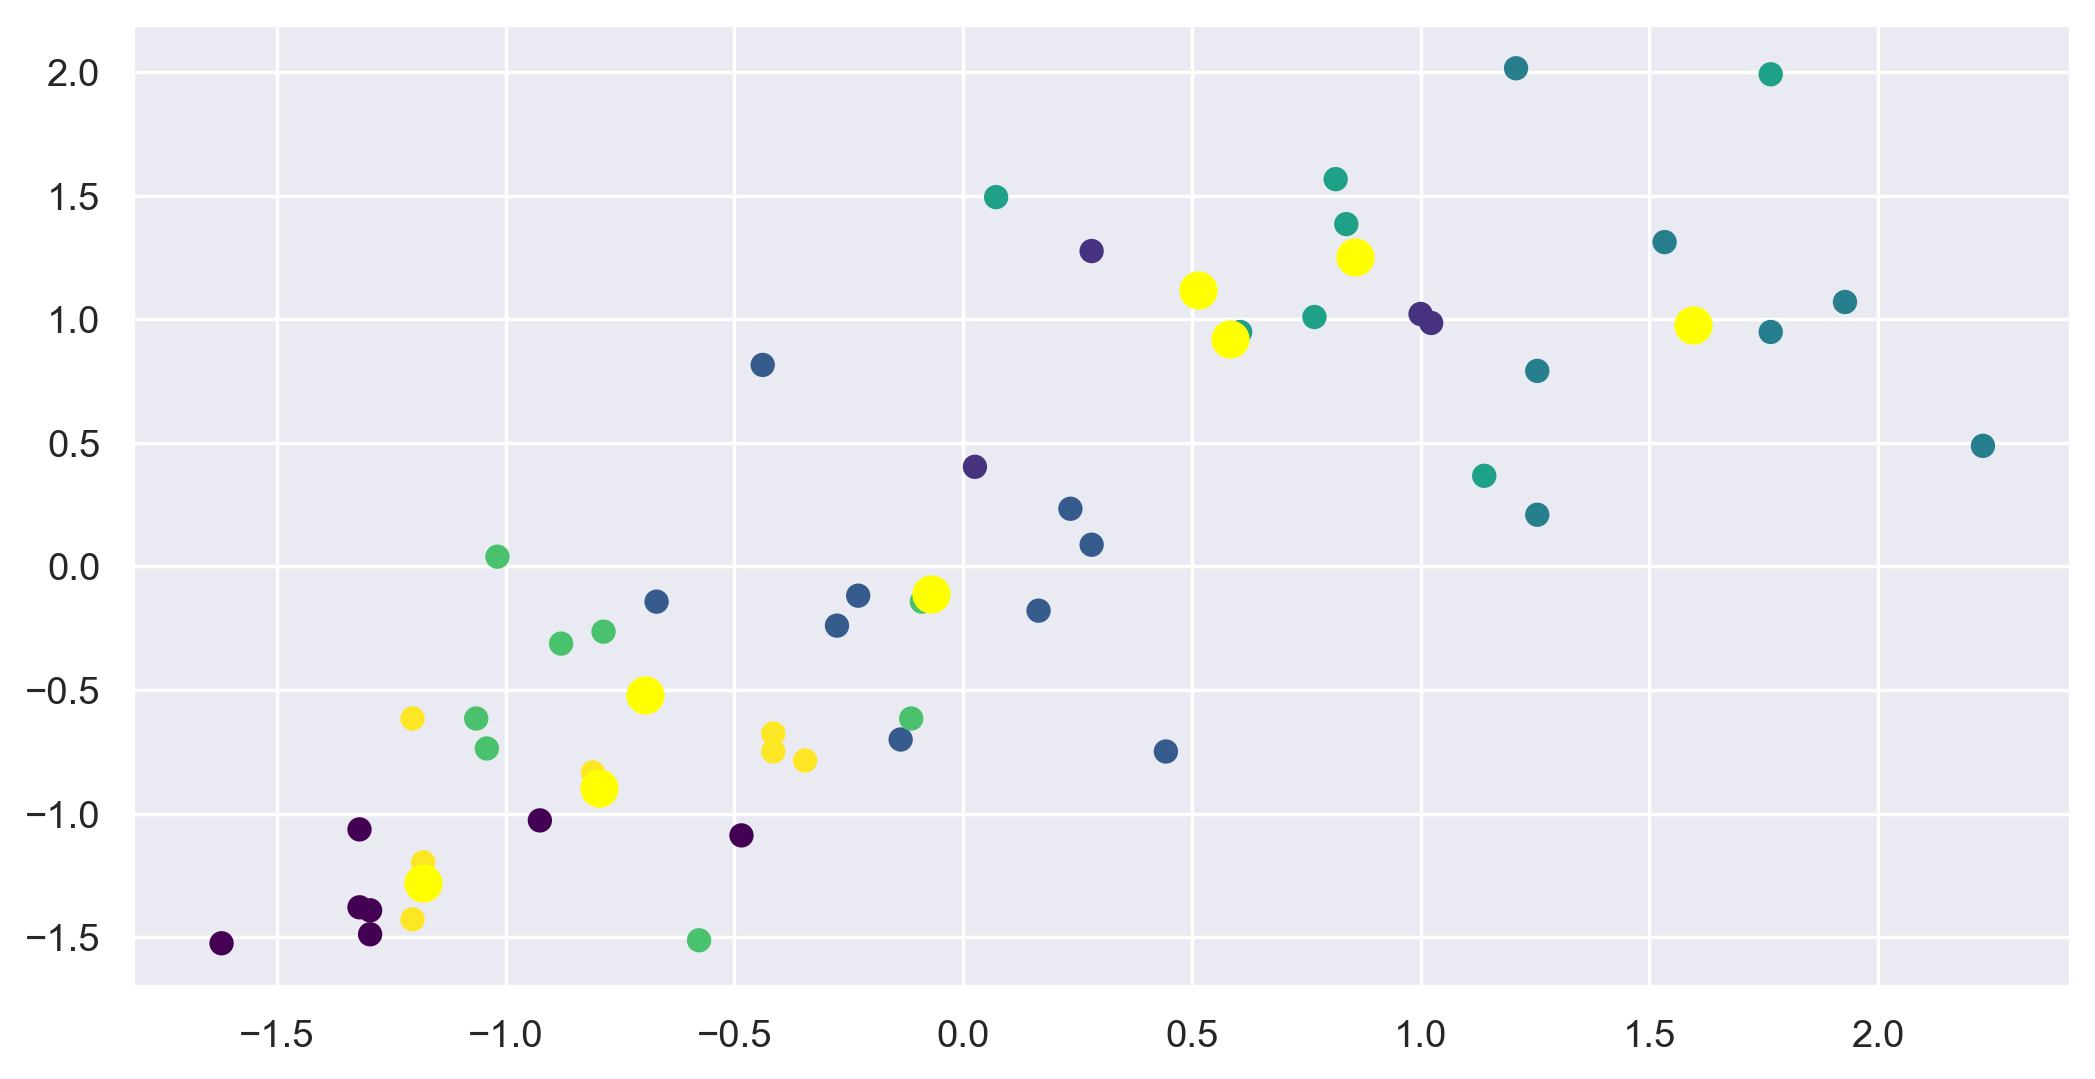

In [53]:
plt.scatter(x[:,0],x[:,1], c=yp, cmap="viridis")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[0:,1], c = "yellow", s = 100)

In [54]:
km.inertia_

35.86520050358845

# Elbow graph 

In [55]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [56]:
wcss

[200.00000000000006,
 104.56313768454173,
 79.56258408658486,
 57.03959845669982,
 49.85822634326756,
 43.89716651319129,
 39.87868318553729,
 36.510265215234305,
 31.608897346344516,
 27.236735582341055]

Text(0.5, 1.0, 'Elbow Graph')

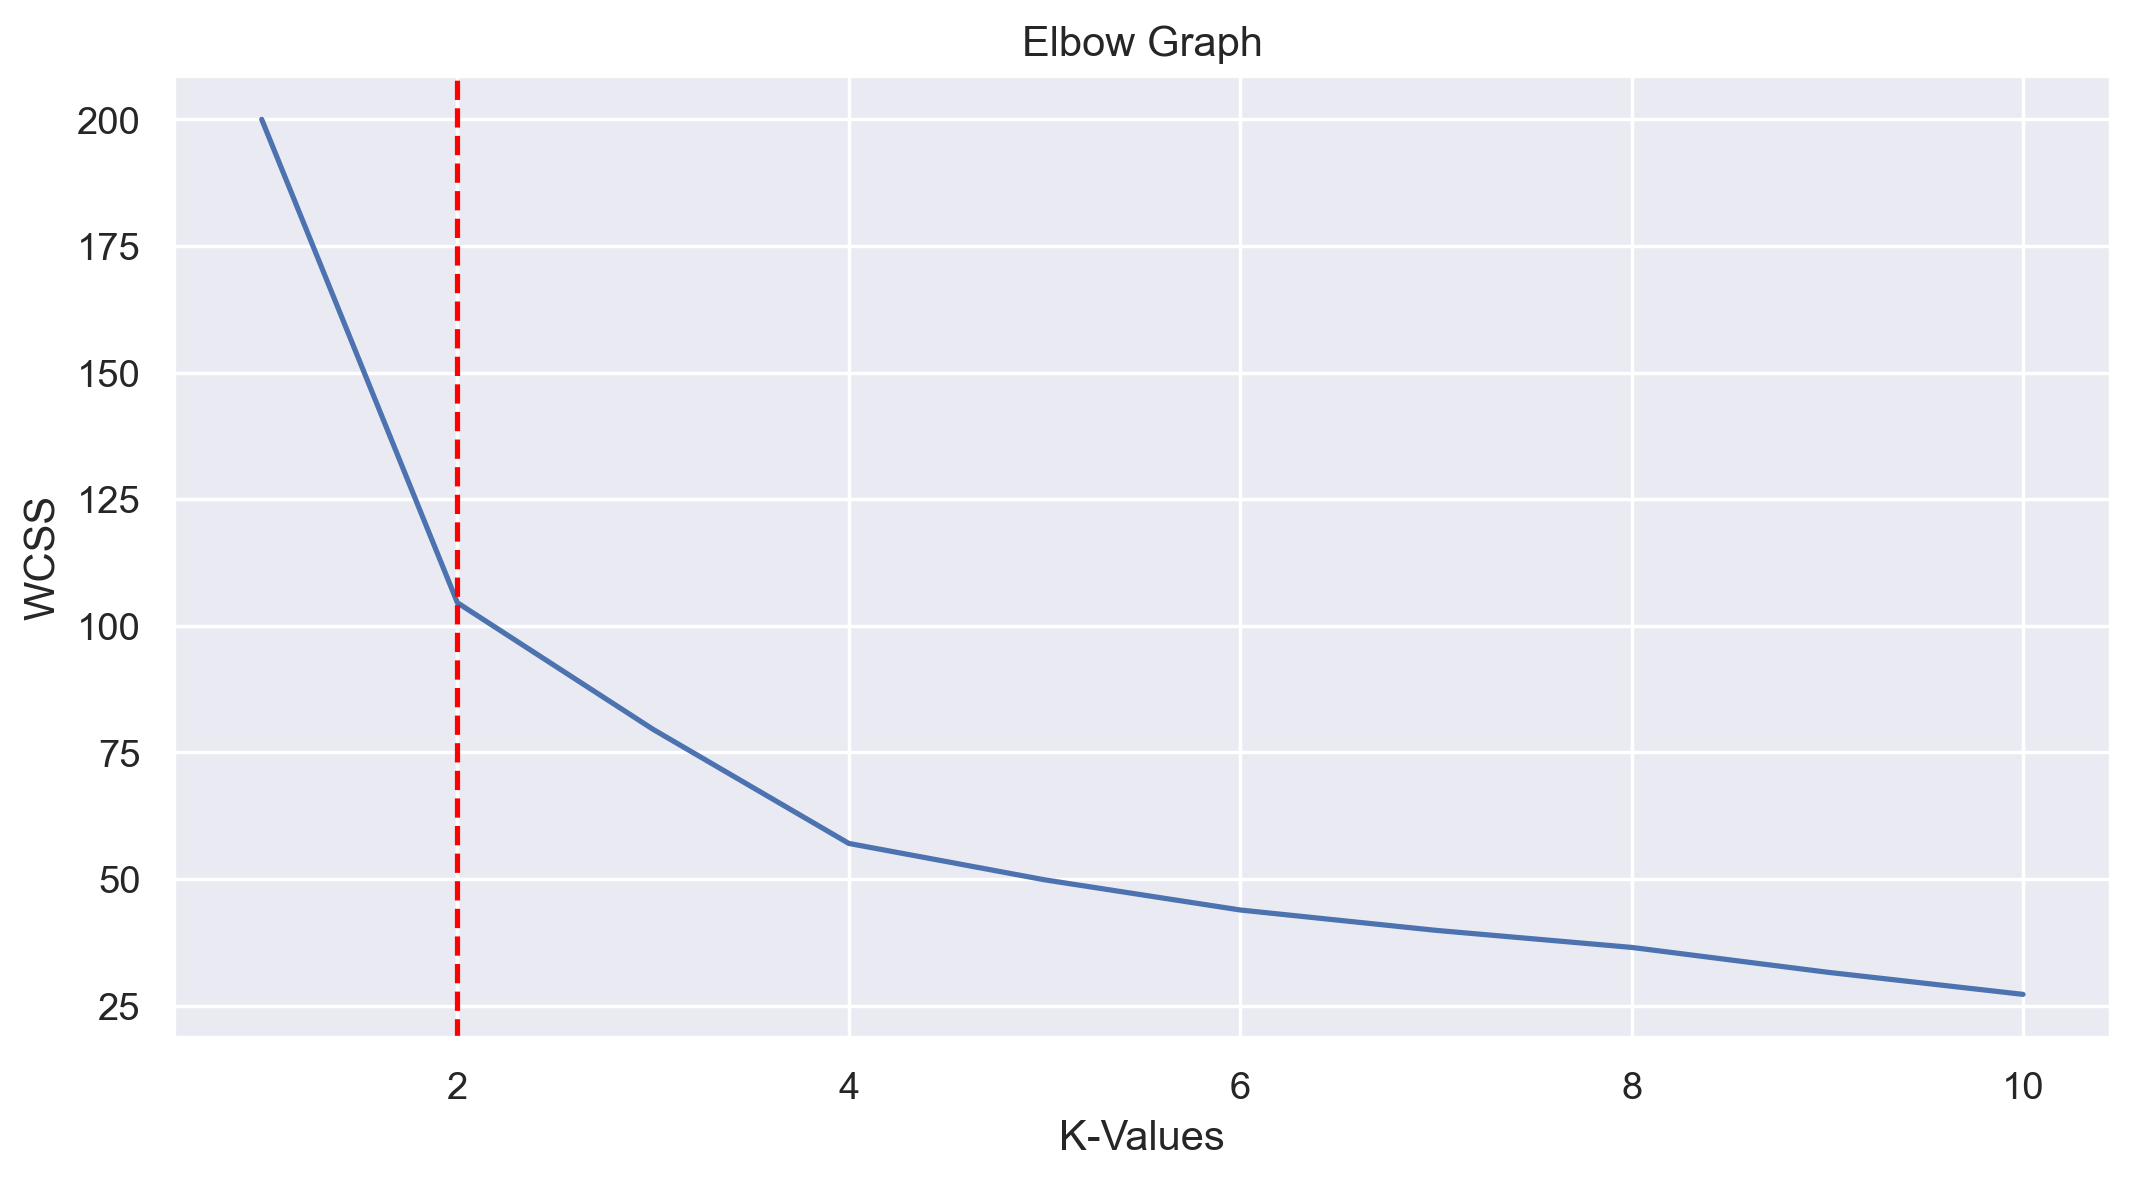

In [57]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 2, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

# Final Model

In [67]:
km = KMeans(n_clusters=2)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

# Visualize the clusters

In [68]:
km.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57501474],
       [ 1.01513667,  1.02412028,  0.19959126,  0.86252211]])

In [69]:
km.cluster_centers_[:,0]

array([-0.67675778,  1.01513667])

In [70]:
km.cluster_centers_[:,1]

array([-0.68274685,  1.02412028])

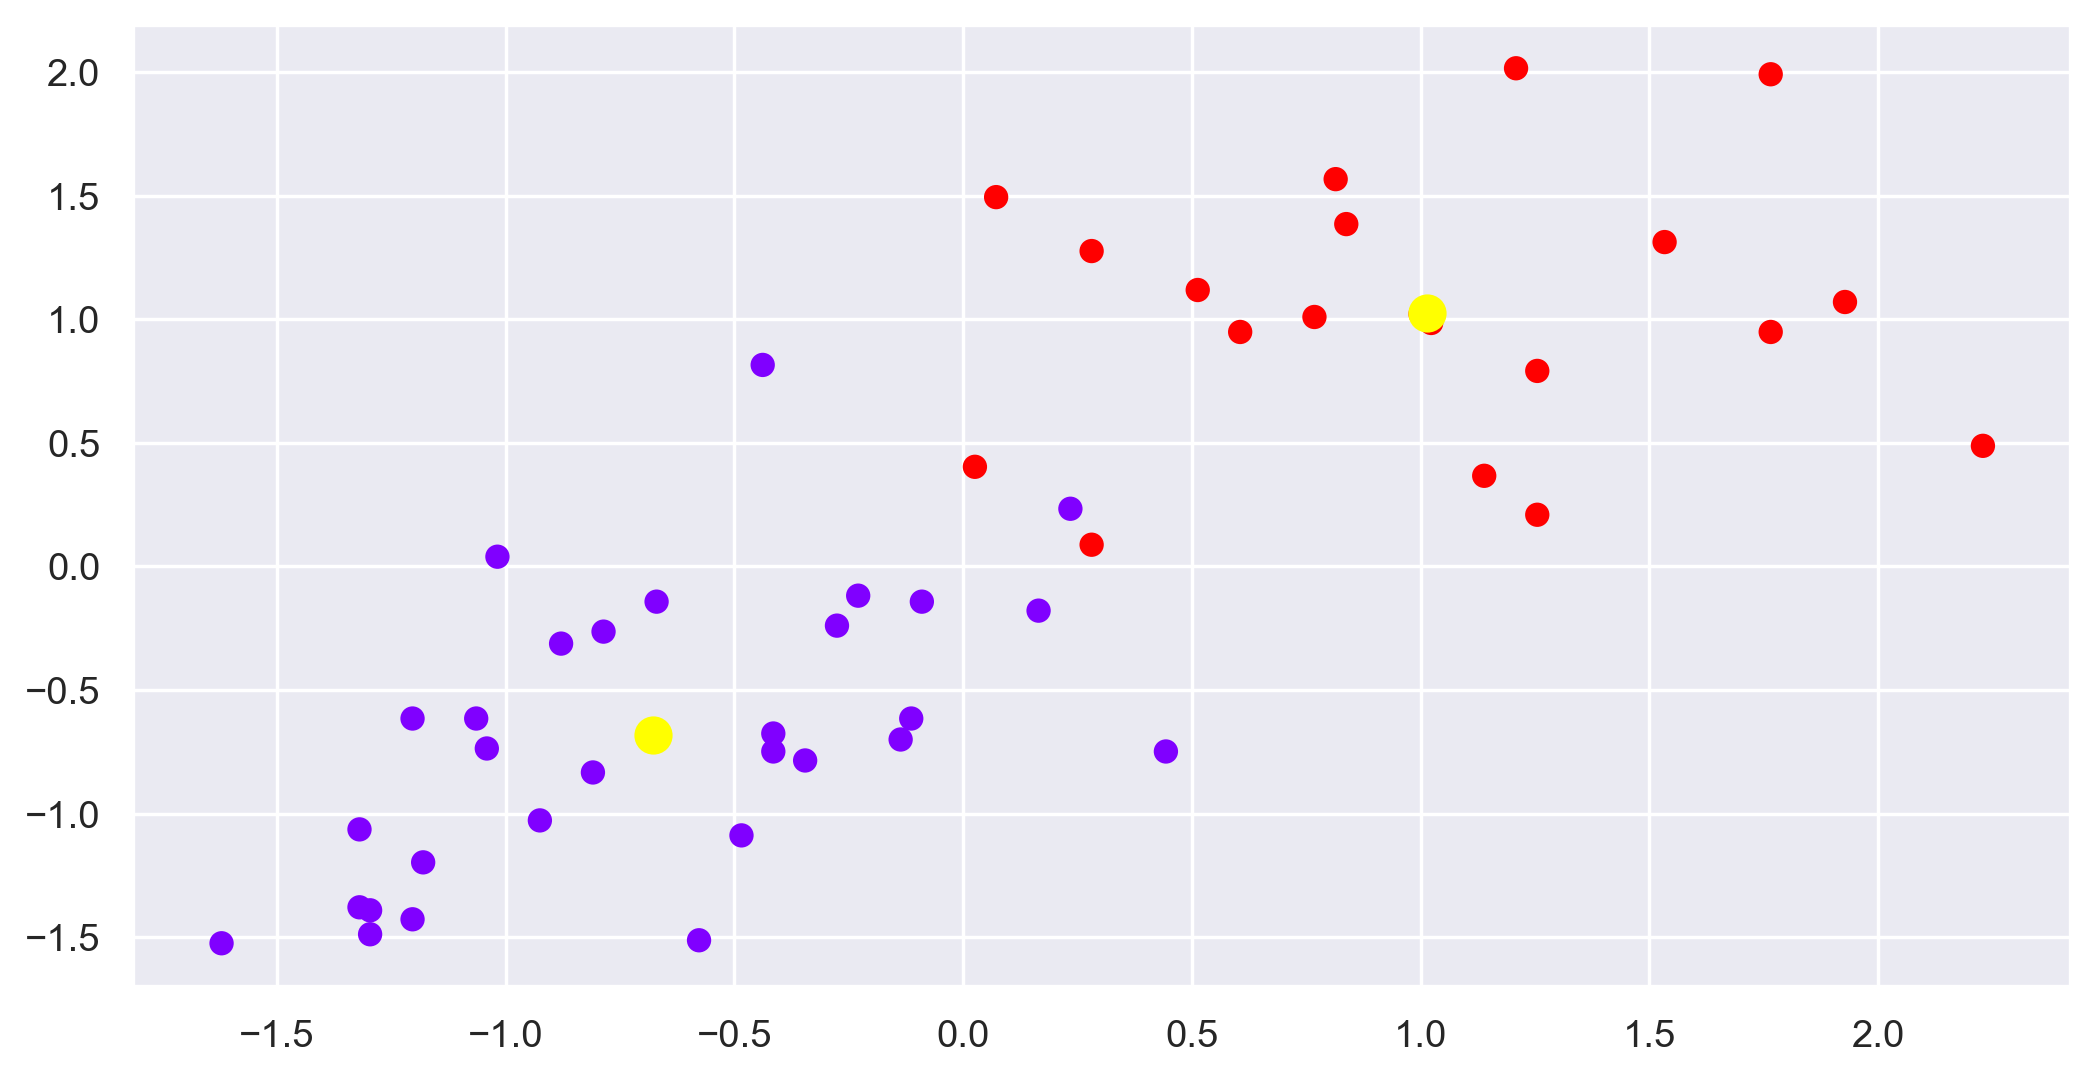

In [71]:
plt.scatter(x[:,0], x[:,1], c=ypred, cmap="rainbow")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c= "yellow", s =100)

# Evaluation of Kmeans

# Silhouette score

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_score(x,ypred)

0.4094189143100629

# Analyzing clusters

In [74]:
df['Kmeans cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,Hierarchical Clustering,Kmeans cluster
Alabama,13.2,236,58,21.200,1,1
Alaska,10.0,263,48,42.825,1,1
Arizona,8.1,294,80,31.000,1,1
Arkansas,8.8,190,50,19.500,0,0
California,9.0,276,91,40.600,1,1
Colorado,7.9,204,78,38.700,1,1
Connecticut,3.3,110,77,11.100,0,0
Delaware,5.9,238,72,15.800,0,0
Florida,15.4,335,80,31.900,1,1
Georgia,17.4,211,60,25.800,1,1


# DBSCAN

In [78]:
from sklearn.cluster import DBSCAN

In [88]:
dbscan = DBSCAN(eps=0.98, min_samples=3)
labels = dbscan.fit_predict(x)

# Noisy samples are given the label -1.

In [90]:
labels

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [91]:
from sklearn.metrics import silhouette_score

In [92]:
silhouette_score(x,labels)

0.17800186788696198

# Hyperparameter tuning

# Selecting Min_samples:
1. Number of columns + 1
2. Number of columns * 2
3. Always keep min_sample at least 3.

# Finding out the best eps value(K-dist Plot)
- This technique calculates the average distance between each point and its k nearest neighbors, where k is the MinPts value you selected. 
- The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [93]:
from sklearn.neighbors import NearestNeighbors

In [94]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [95]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.780470,0.861361
1,0.0,1.986146,2.066628
2,0.0,1.048587,1.090433
3,0.0,1.006145,1.007681
4,0.0,1.087743,1.301573
5,0.0,1.252157,1.259223
6,0.0,0.886199,0.965379
7,0.0,1.196970,1.271411
8,0.0,1.309753,1.351673
9,0.0,0.872712,1.022878


In [96]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilon value')

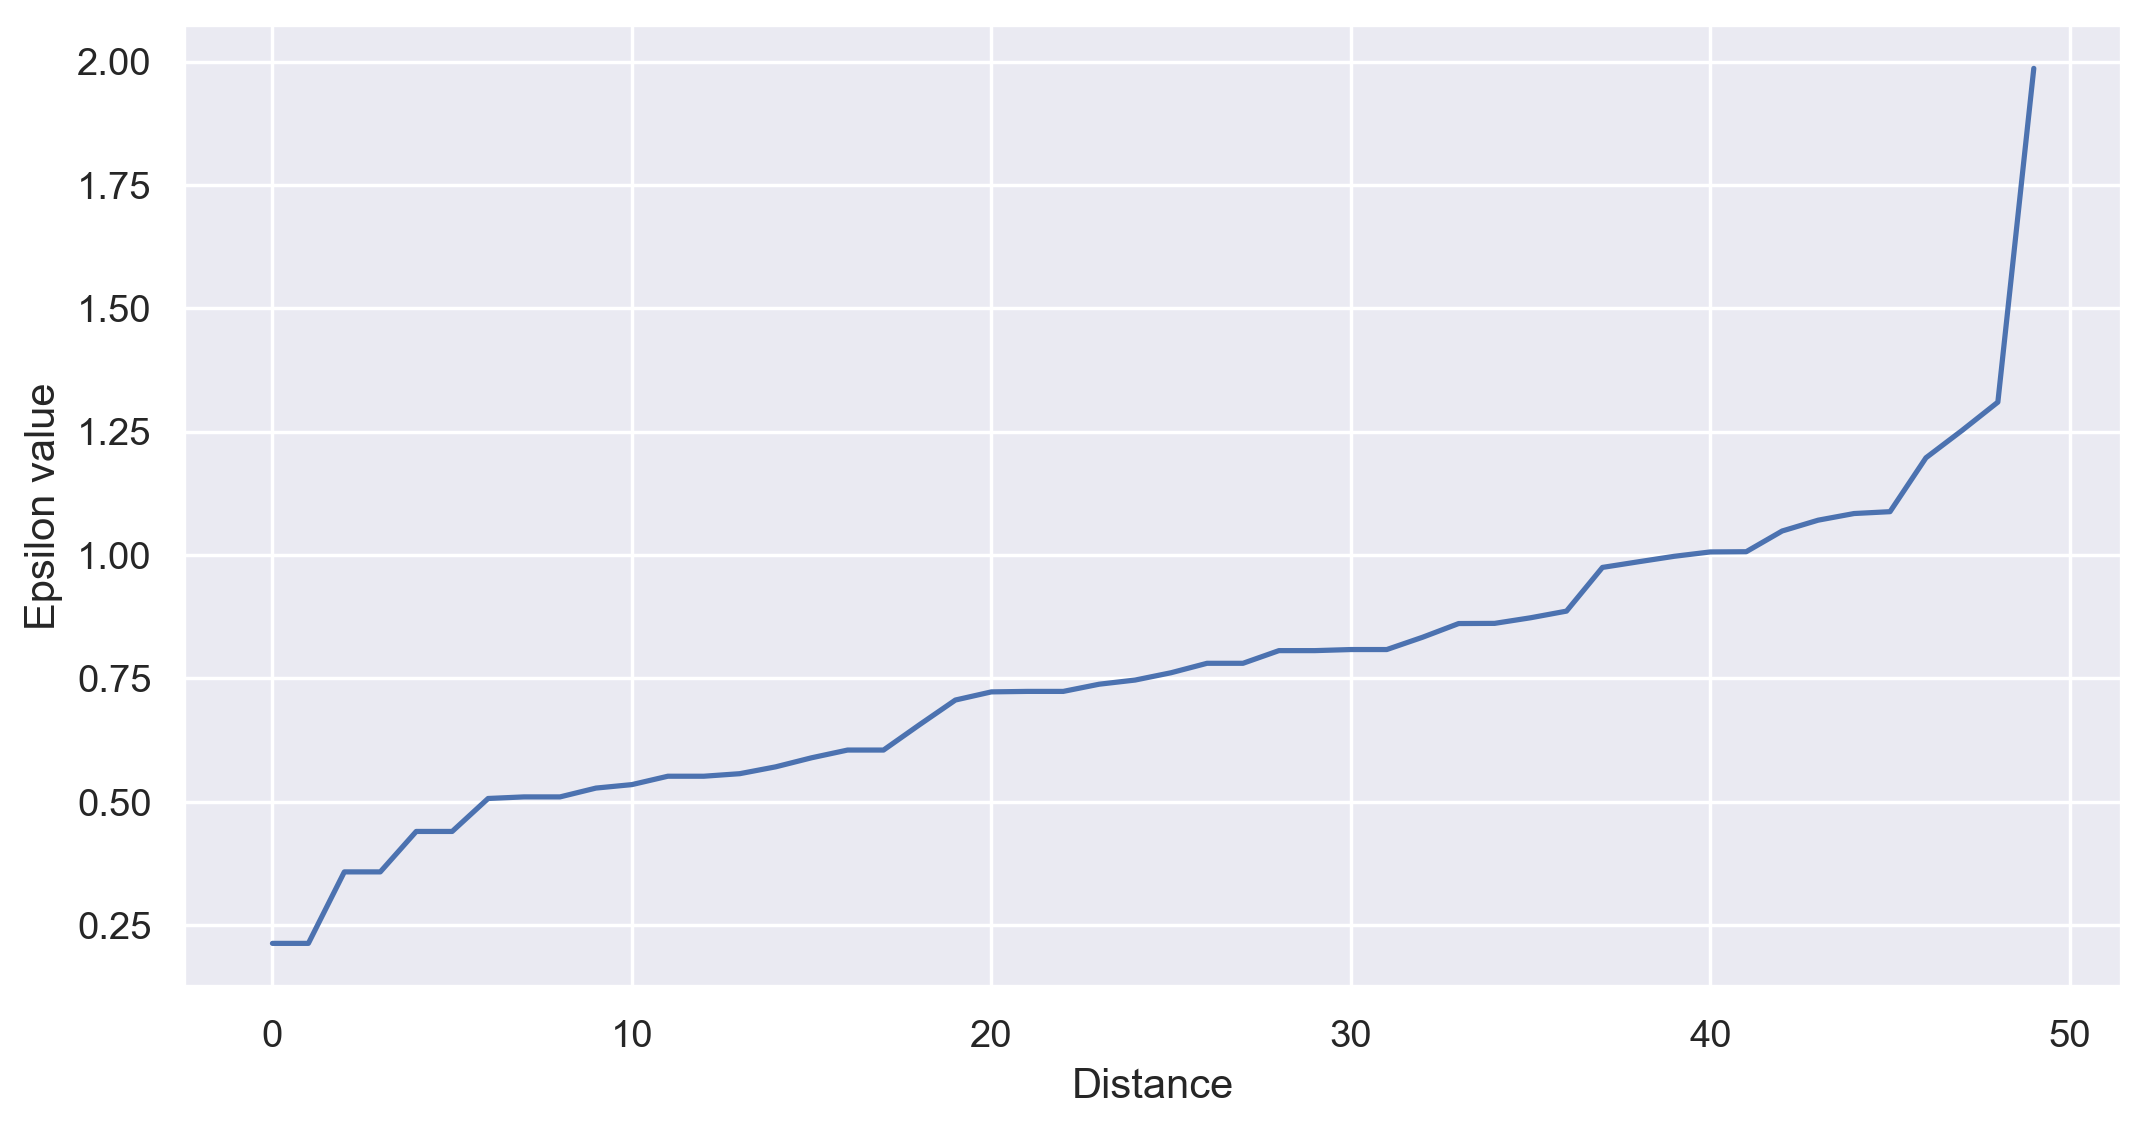

In [97]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')

In [122]:
dbscan = DBSCAN(eps=1.30, min_samples=8)
labels = dbscan.fit_predict(x)
labels

array([-1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [123]:
silhouette_score(x,labels)

0.37178053810292333

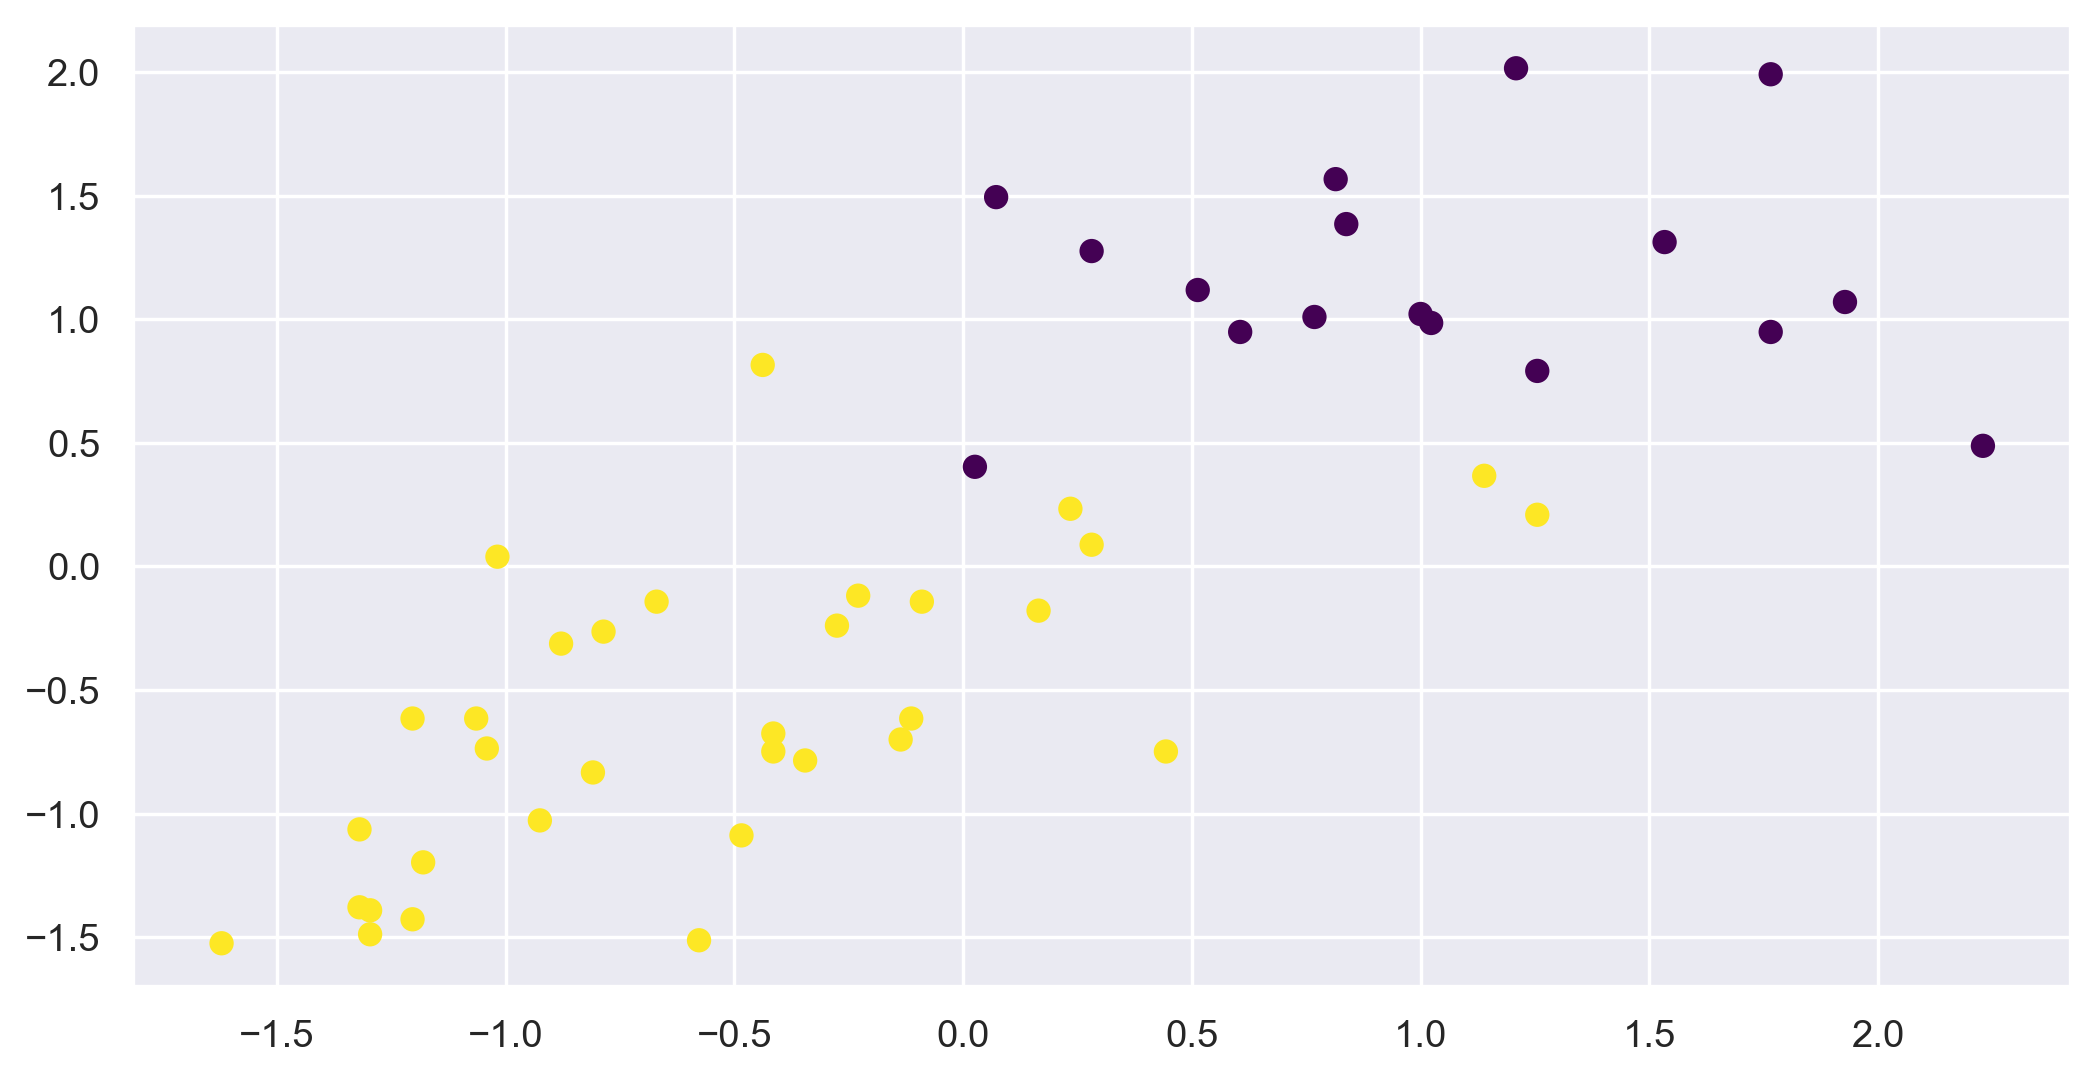

In [124]:
plt.scatter(x[:,0],x[:,1],c = labels,cmap='viridis')

In [125]:
df['DBSCAN'] = labels
df

,Murder,Assault,UrbanPop,Rape,Hierarchical Clustering,Kmeans cluster,DBSCAN
Alabama,13.2,236,58,21.200,1,1,-1
Alaska,10.0,263,48,42.825,1,1,-1
Arizona,8.1,294,80,31.000,1,1,-1
Arkansas,8.8,190,50,19.500,0,0,0
California,9.0,276,91,40.600,1,1,-1
Colorado,7.9,204,78,38.700,1,1,-1
Connecticut,3.3,110,77,11.100,0,0,0
Delaware,5.9,238,72,15.800,0,0,0
Florida,15.4,335,80,31.900,1,1,-1
Georgia,17.4,211,60,25.800,1,1,-1


In [126]:
df.groupby('DBSCAN').agg('mean')

,Murder,Assault,UrbanPop,Rape,Hierarchical Clustering,Kmeans cluster
DBSCAN,,,,,,
-1,12.258824,266.941176,68.176471,29.285294,1.000000,1.000000
0,5.484848,121.212121,64.181818,16.936364,0.060606,0.090909


In [128]:
df[df['DBSCAN']==-1]

,Murder,Assault,UrbanPop,Rape,Hierarchical Clustering,Kmeans cluster,DBSCAN
Alabama,13.2,236,58,21.200,1,1,-1
Alaska,10.0,263,48,42.825,1,1,-1
Arizona,8.1,294,80,31.000,1,1,-1
California,9.0,276,91,40.600,1,1,-1
Colorado,7.9,204,78,38.700,1,1,-1
Florida,15.4,335,80,31.900,1,1,-1
Georgia,17.4,211,60,25.800,1,1,-1
Illinois,10.4,249,83,24.000,1,1,-1
Louisiana,15.4,249,66,22.200,1,1,-1
Maryland,11.3,300,67,27.800,1,1,-1


In [129]:
df[df['DBSCAN']==0]

,Murder,Assault,UrbanPop,Rape,Hierarchical Clustering,Kmeans cluster,DBSCAN
Arkansas,8.8,190,50,19.5,0,0,0
Connecticut,3.3,110,77,11.1,0,0,0
Delaware,5.9,238,72,15.8,0,0,0
Hawaii,5.3,46,83,20.2,0,0,0
Idaho,2.6,120,54,14.2,0,0,0
Indiana,7.2,113,65,21.0,0,0,0
Iowa,2.2,56,57,11.3,0,0,0
Kansas,6.0,115,66,18.0,0,0,0
Kentucky,9.7,109,52,16.3,0,0,0
Maine,2.1,83,51,7.8,0,0,0
